In [159]:
import os
import numpy as np
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

import pandas as pd
from Bio import SeqIO
import matplotlib.pyplot as plt
from matplotlib import cm
from matplotlib.patches import Patch
import mpl_stylesheet
import re
import gc
mpl_stylesheet.banskt_presentation(fontfamily = 'mono', fontsize = 20, colors = 'banskt', dpi = 300)

In [160]:
# Load the data
import json

disprot_file = "AF2_testset.json"
with open(disprot_file) as infmt:
    disprot_dict = json.load(infmt)
    
monomer_file = "monomer_datadict.json"
with open(monomer_file) as infmt:
    monomer_dict = json.load(infmt)

with open("monomer_multi_loss.json") as infmt:
    mono_loss = json.load(infmt)
    
with open("disprot_multi_loss.json") as infmt:
    disprot_loss = json.load(infmt)
    
with open("monomer_multi_mismatch.json") as infmt:
    mono_mismatch = json.load(infmt)
    
with open("disprot_multi_mismatch.json") as infmt:
    disprot_mismatch = json.load(infmt)

In [161]:
mono_allloss = list()
disprot_allloss = list()
mono_lengths = list()
disprot_lengths = list()
for protid in mono_loss.keys():
    mono_allloss += mono_loss[protid]['aa1_loss']
    mono_lengths += list(np.repeat(len(monomer_dict[protid]['seq']),len(monomer_dict[protid]['seq'])))
    
for protid in disprot_loss.keys():
    disprot_allloss += disprot_loss[protid]['aa1_loss']
    disprot_lengths += list(np.repeat(len(disprot_dict[protid]['seq']),len(disprot_dict[protid]['seq'])))
    
disprot_allloss = np.array(disprot_allloss)
mono_allloss = np.array(mono_allloss)
mono_lengths = np.array(mono_lengths)
disprot_lengths = np.array(disprot_lengths)

In [162]:
## perplexity (simple)

disprot_perplex = np.exp(disprot_allloss/disprot_lengths)
mono_perplex = np.exp(mono_allloss/mono_lengths)

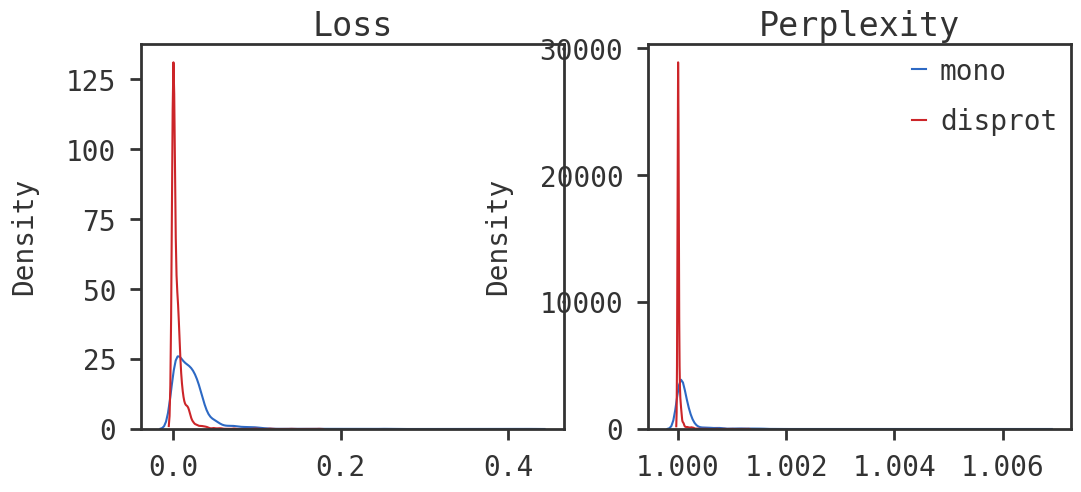

In [163]:
import seaborn as sns
import matplotlib.pyplot as plt
fig = plt.figure(figsize=(12,5),dpi=100)
ax1 = fig.add_subplot(121)
ax2 = fig.add_subplot(122)
sns.kdeplot(mono_allloss, label="mono", ax=ax1)
sns.kdeplot(disprot_allloss, label="disprot", ax=ax1)
ax1.set_title("Loss")
sns.kdeplot(mono_perplex, label="mono", ax=ax2)
sns.kdeplot(disprot_perplex, label="disprot", ax=ax2)
ax2.set_title("Perplexity")
plt.legend()
plt.show()

In [164]:
mono_allfiveloss = list()
disprot_allfiveloss = list()
mono_5lengths = list()
disprot_5lengths = list()

for protid in mono_loss.keys():
    mono_allfiveloss += mono_loss[protid]['aa5_loss']
    mono_5lengths += list(np.repeat(len(monomer_dict[protid]['seq']),len(mono_loss[protid]['aa5_loss'])))
    
for protid in disprot_loss.keys():
    disprot_allfiveloss += disprot_loss[protid]['aa5_loss']
    disprot_5lengths += list(np.repeat(len(disprot_dict[protid]['seq']),len(disprot_loss[protid]['aa5_loss'])))

mono_5lengths = np.array(mono_5lengths)
disprot_5lengths = np.array(disprot_5lengths)
mono_allfiveloss = np.array(mono_allfiveloss)
disprot_allfiveloss = np.array(disprot_allfiveloss)

In [165]:
print(len(mono_allfiveloss), len(disprot_allfiveloss))

1873 3816


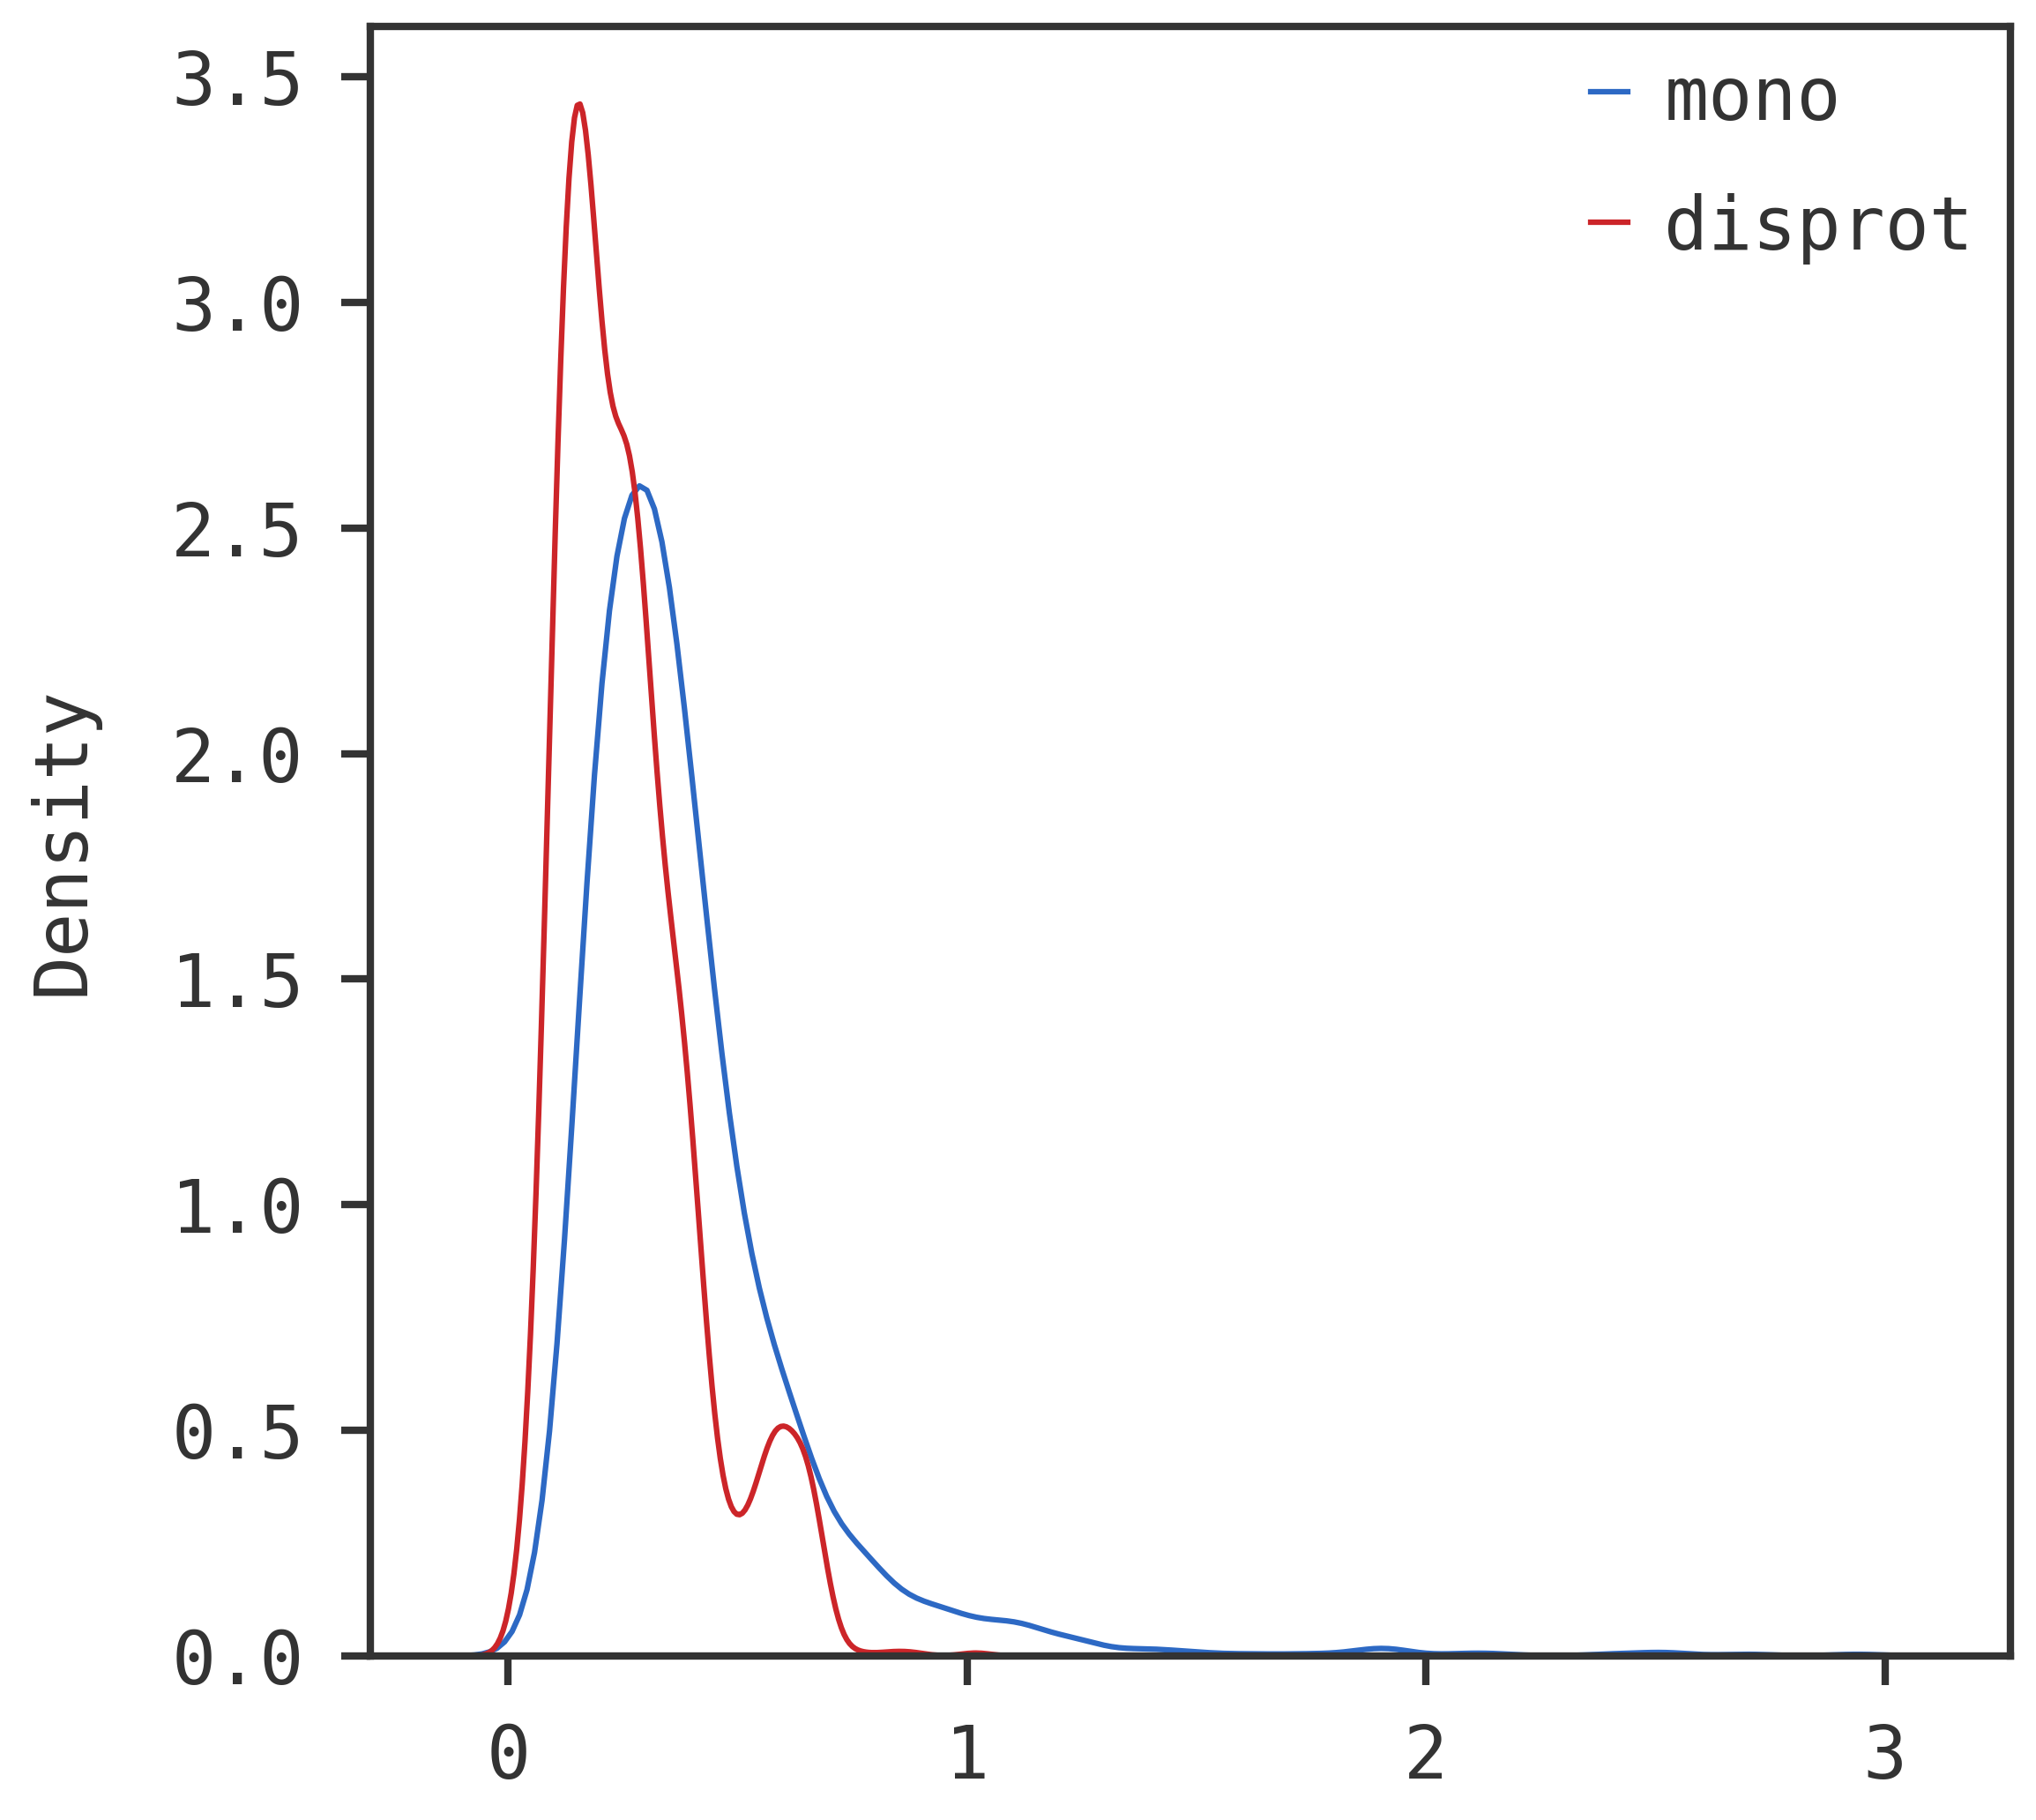

In [166]:

sns.kdeplot(mono_allfiveloss, label="mono")
sns.kdeplot(disprot_allfiveloss[:len(mono_allfiveloss)], label="disprot")
# sns.kdeplot(mono_allfiveloss*mono_5lengths, label="mono")
# sns.kdeplot(disprot_allfiveloss*disprot_5lengths, label="disprot")
plt.legend()
plt.show()

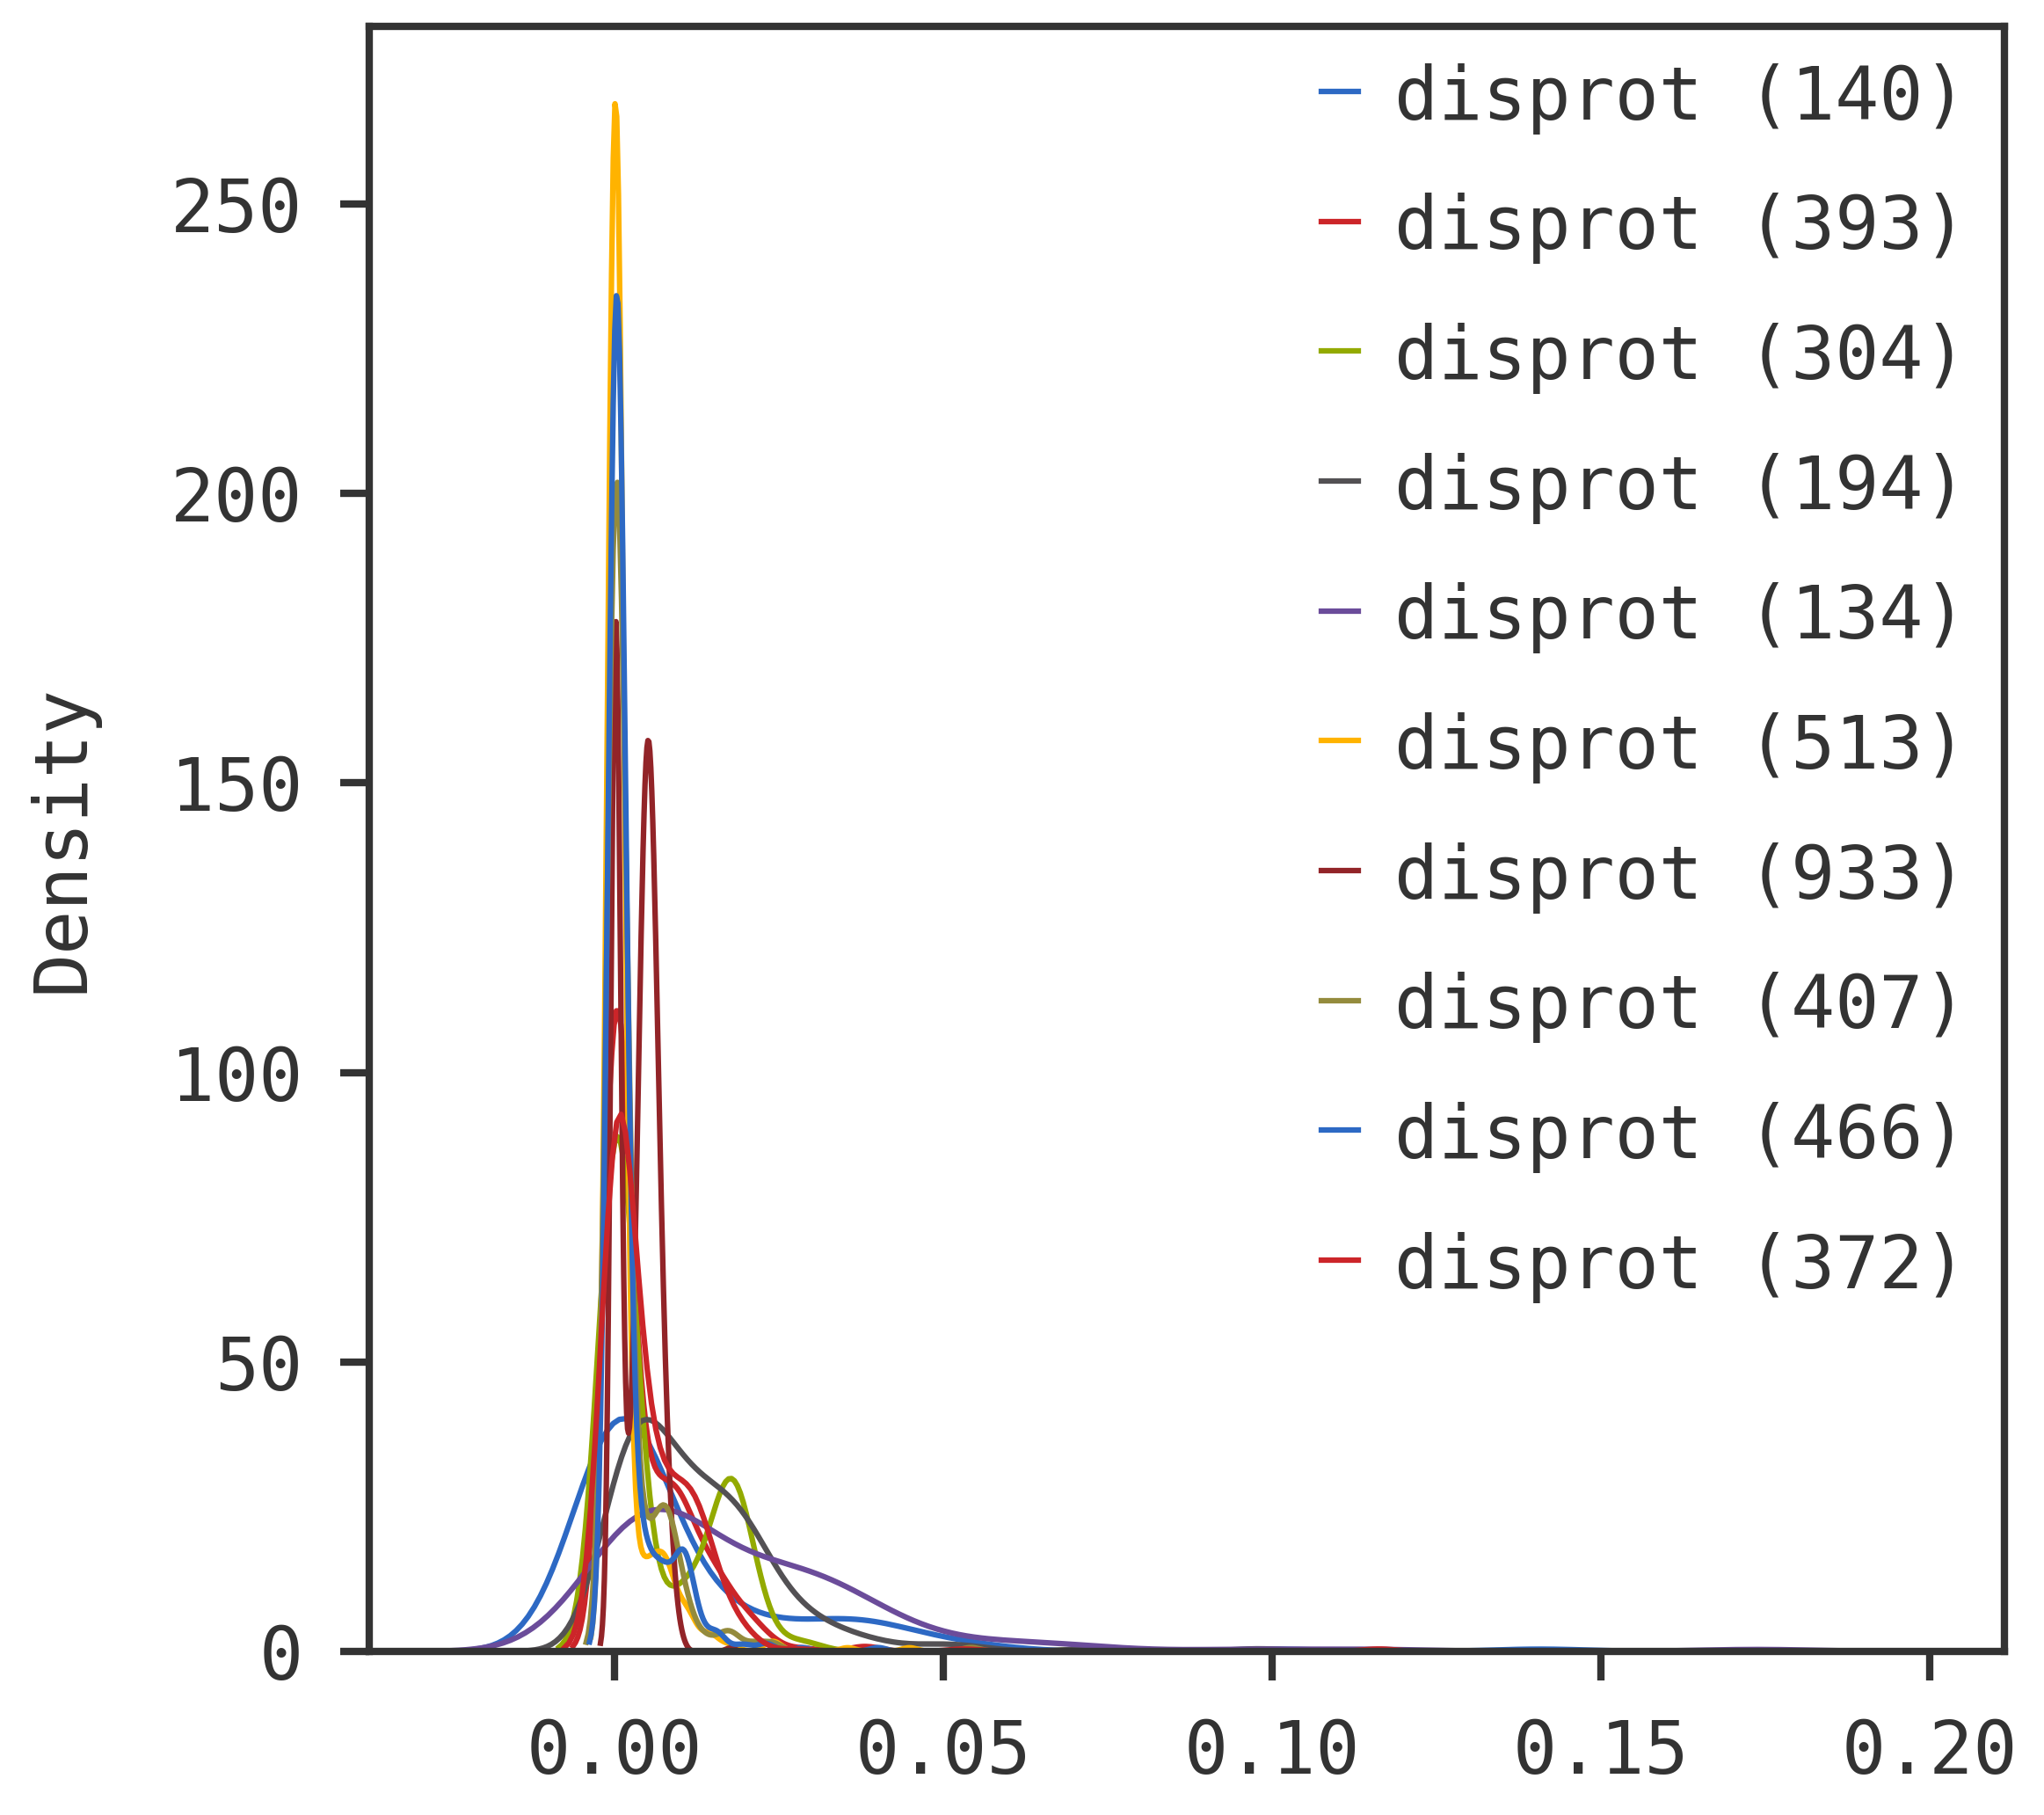

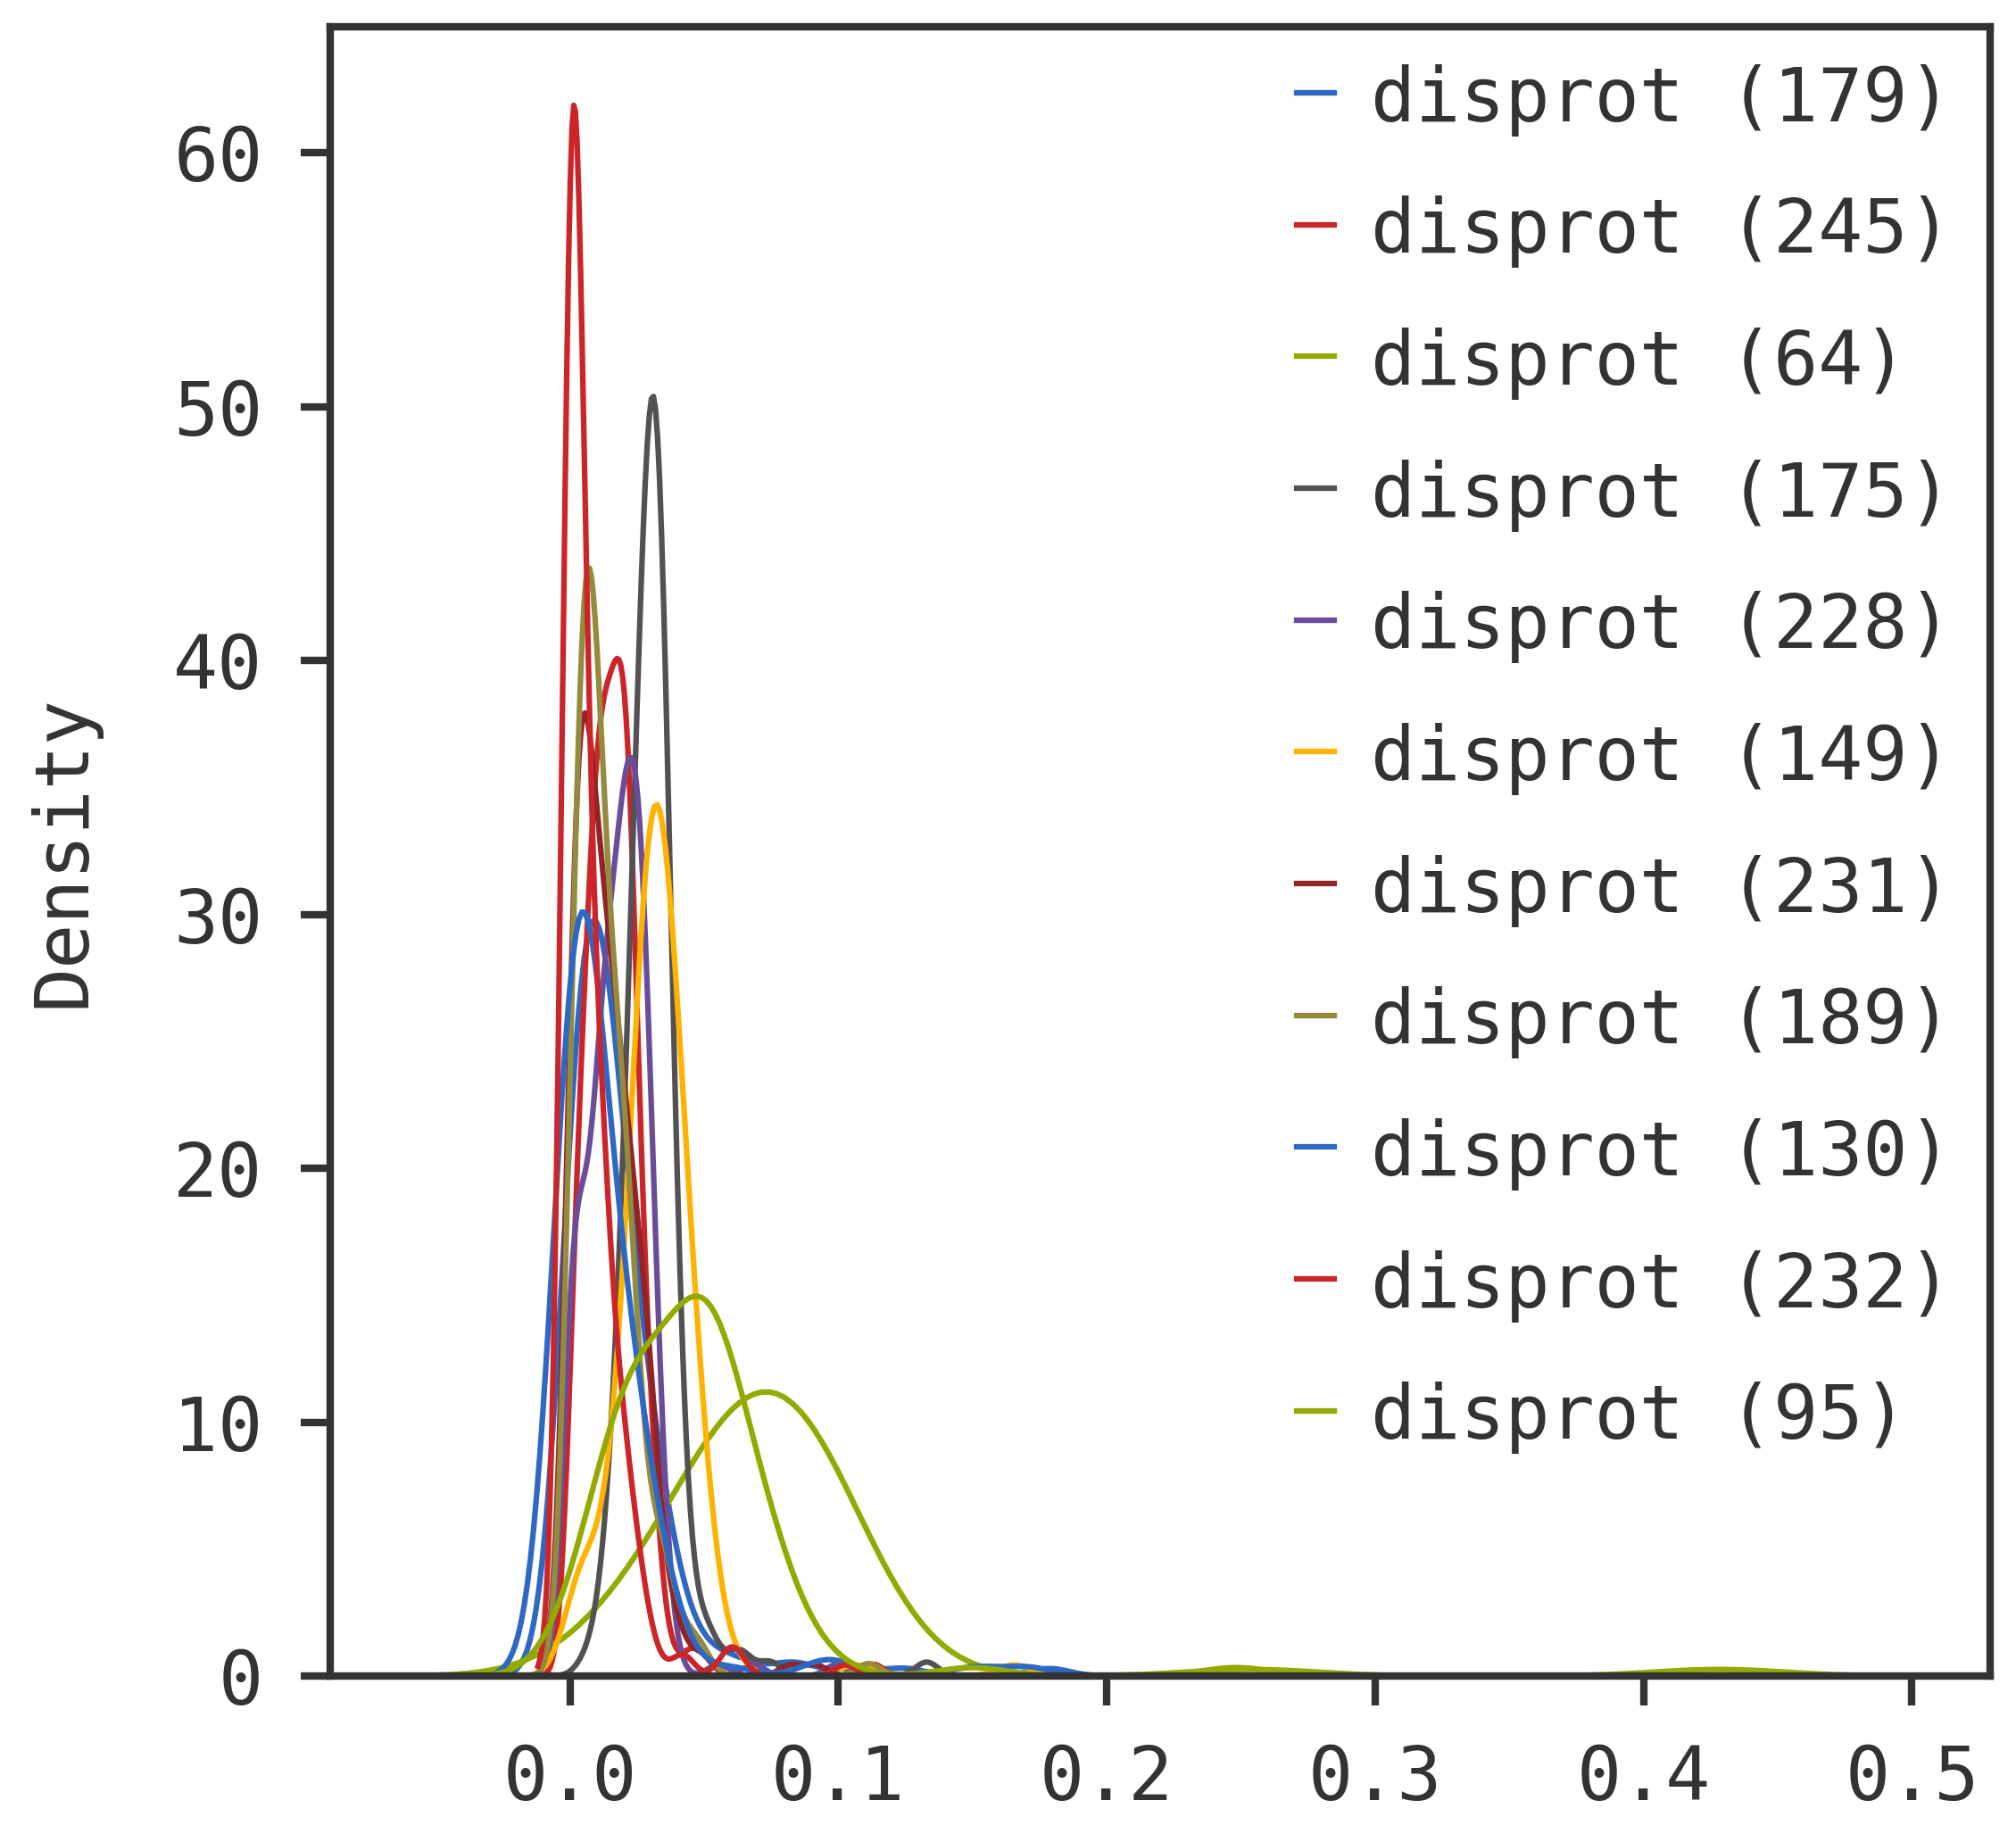

In [167]:
mono_allloss = list()
disprot_allloss = list()
# for protid in mono_singleloss.keys():
#     data = mono_singleloss[protid]['singleaa_loss']
#     sns.kdeplot(data, label=f"mono ({len(data)})")
    
for protid in disprot_loss.keys():
    data = np.array(disprot_loss[protid]['aa1_loss'])
#     sns.kdeplot(data*len(data), label=f"disprot ({len(data)})")
    sns.kdeplot(data, label=f"disprot ({len(data)})")
    
plt.legend()
plt.show()

for monoid in mono_loss.keys():
    data = np.array(mono_loss[monoid]['aa1_loss'])
#     sns.kdeplot(data*len(data), label=f"mono ({len(data)})")
    sns.kdeplot(data, label=f"disprot ({len(data)})")
    
plt.legend()
plt.show()

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


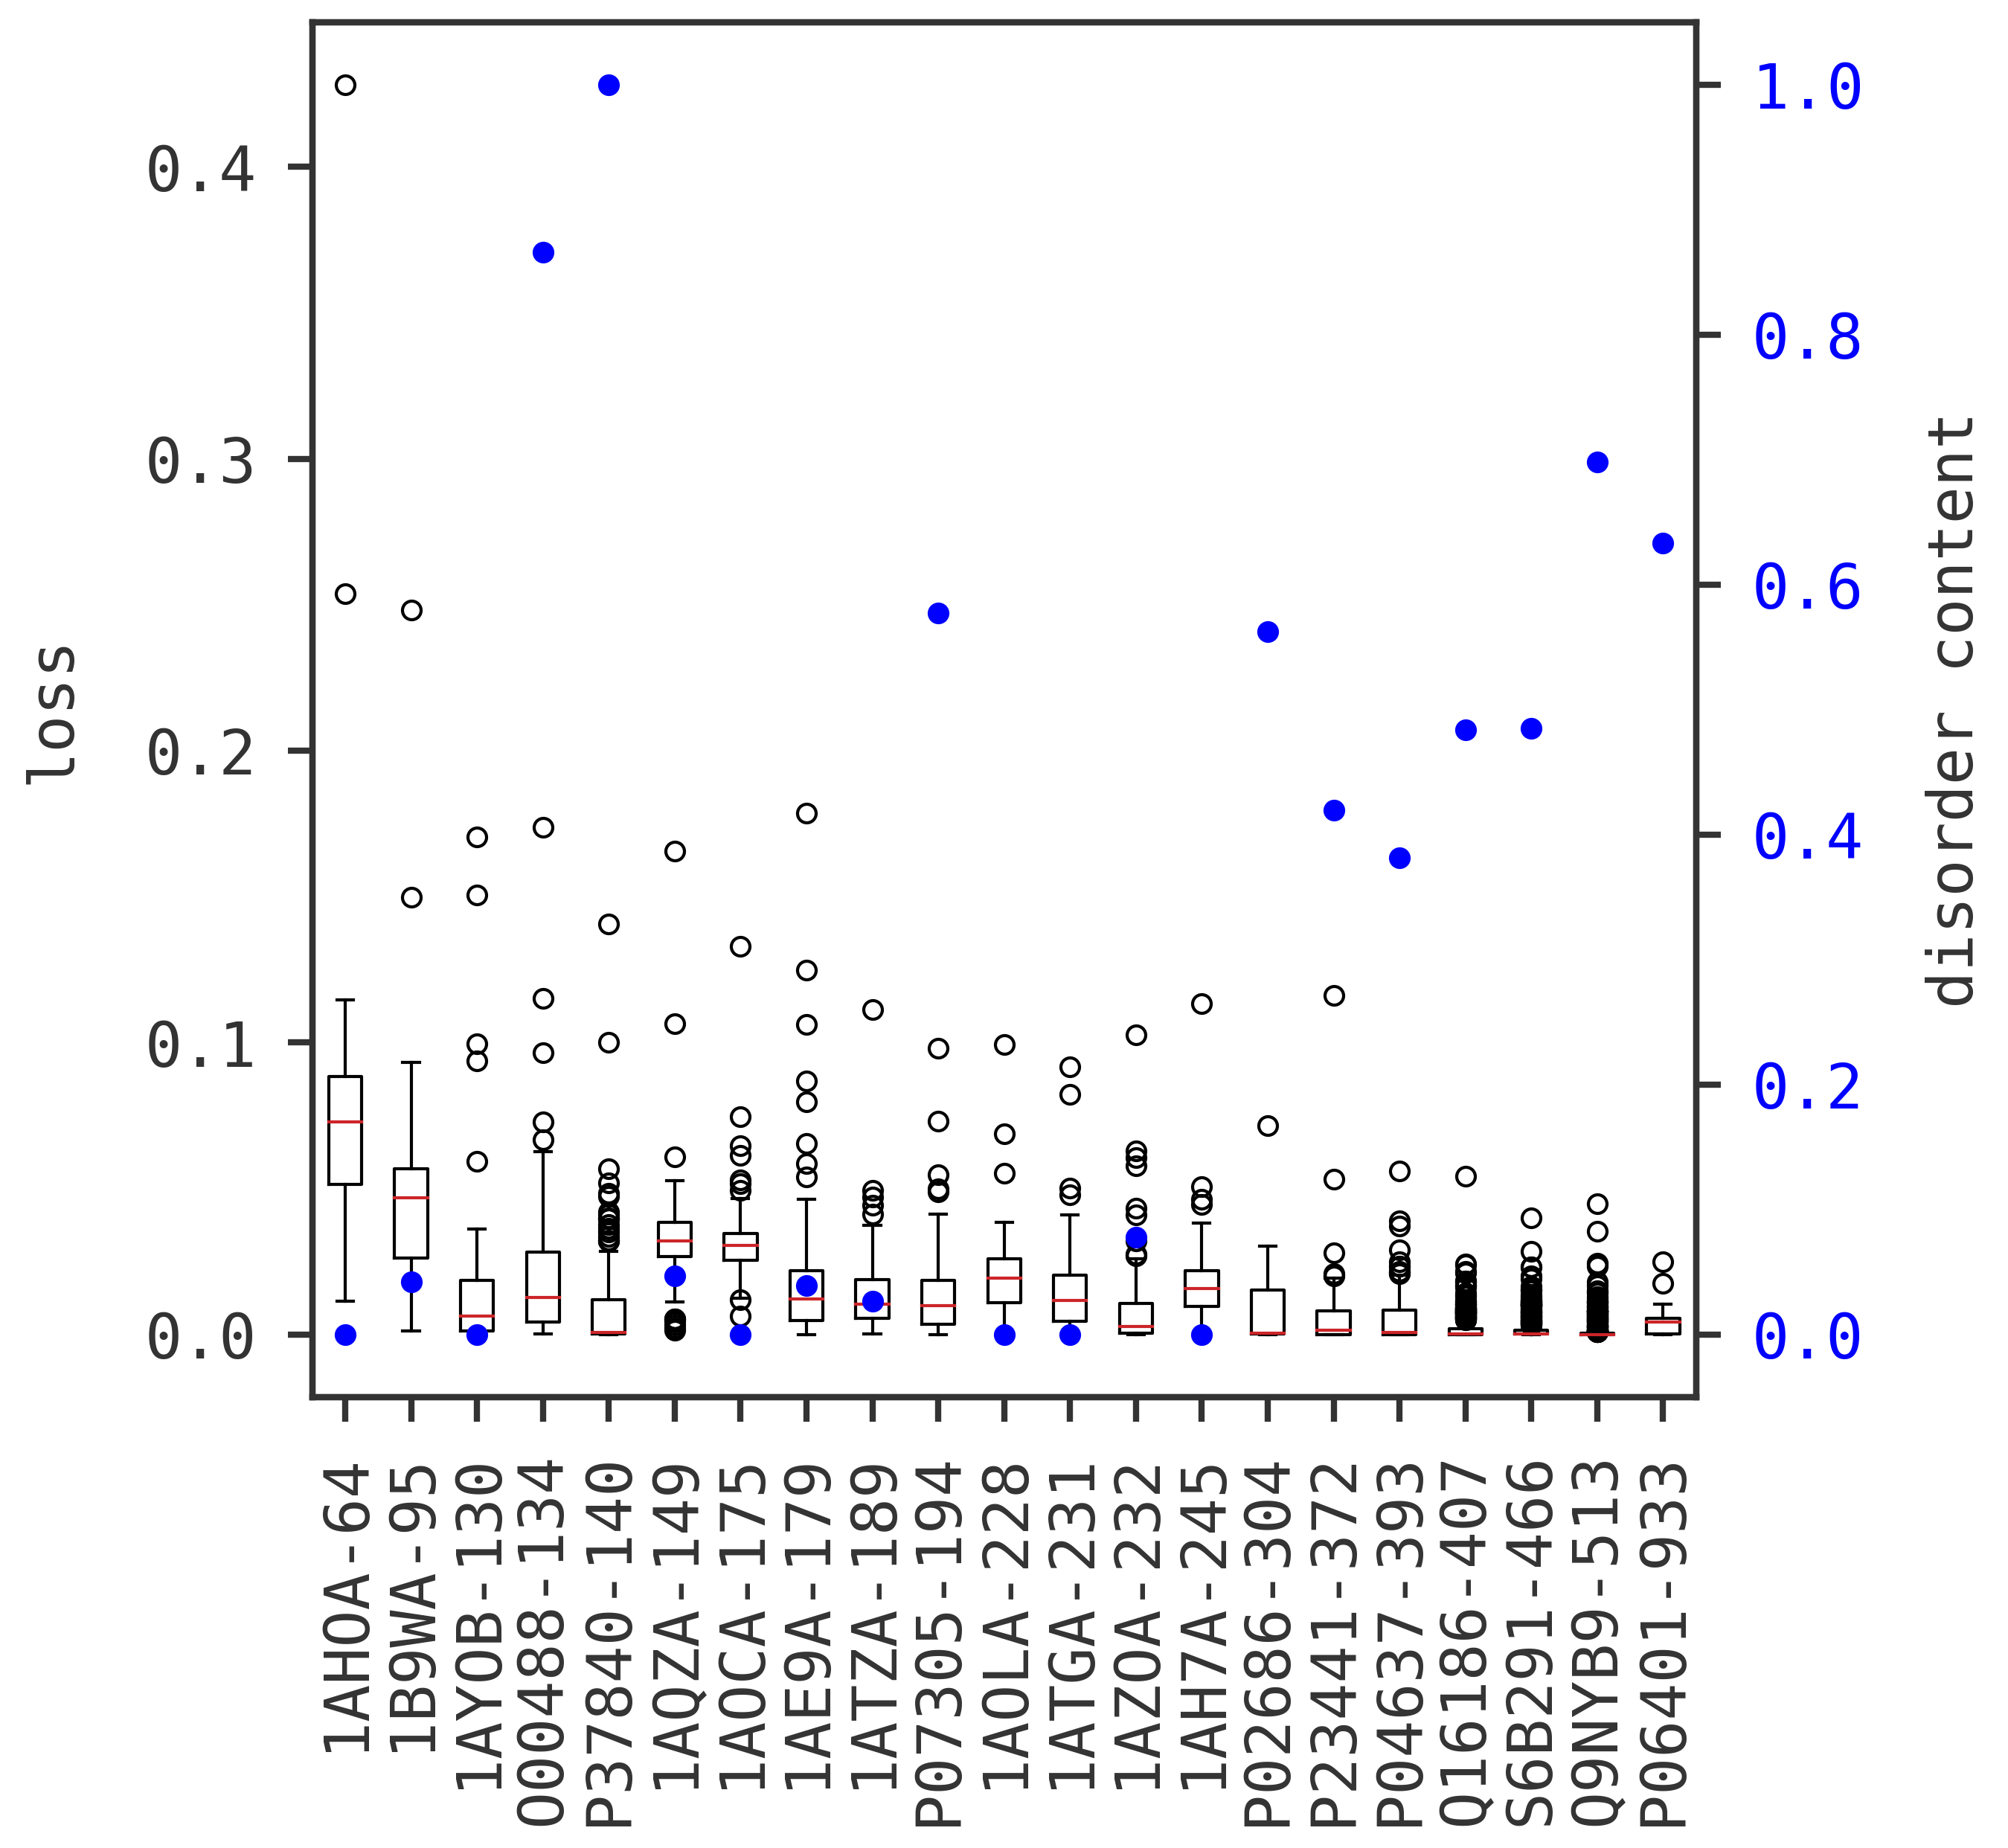

In [168]:
## it suggest loss distribution depends on sequence length, which doesn't surprise me. Let's check that

### Get disorder content
def get_disorder_content(annot):
    contents = [ x != "-" for x in annot]
    DC = np.sum(contents) / len(contents)
    return DC

data = list()
labels = list()
dc = list()
for protid in disprot_loss.keys():
    data.append(np.array(disprot_loss[protid]['aa1_loss']))
    labels.append(f"{protid}-{len(disprot_dict[protid]['seq'])}")
    dc.append(get_disorder_content(disprot_dict[protid]['disorder']))
    
for protid in mono_loss.keys():
    data.append(np.array(mono_loss[protid]['aa1_loss']))
    labels.append(f"{protid}-{len(monomer_dict[protid]['seq'])}")
    dc.append(get_disorder_content(monomer_dict[protid]['disorder']))
    
ix_sorted = np.argsort([len(x) for x in data])
fig = plt.figure()
ax1 =  fig.add_subplot(111)
ax1.boxplot([data[i] for i in ix_sorted], labels=[labels[i] for i in ix_sorted])
ax2 = ax1.twinx()  # instantiate a second axes that shares the same x-axis

ax2.scatter(np.arange(1,len(data)+1), [dc[i] for i in ix_sorted], color='blue')
    
plt.legend()
ax2.tick_params(axis='y', labelcolor='blue')
ax2.set_ylabel("disorder content")
ax1.set_ylabel("loss")
ax1.set_xticklabels([labels[i] for i in ix_sorted], rotation=90, ha='center')
plt.show()

P37840
P04637
P02686
P07305
O00488
Q9NYB9
P06401
Q16186
S6B291
P23441


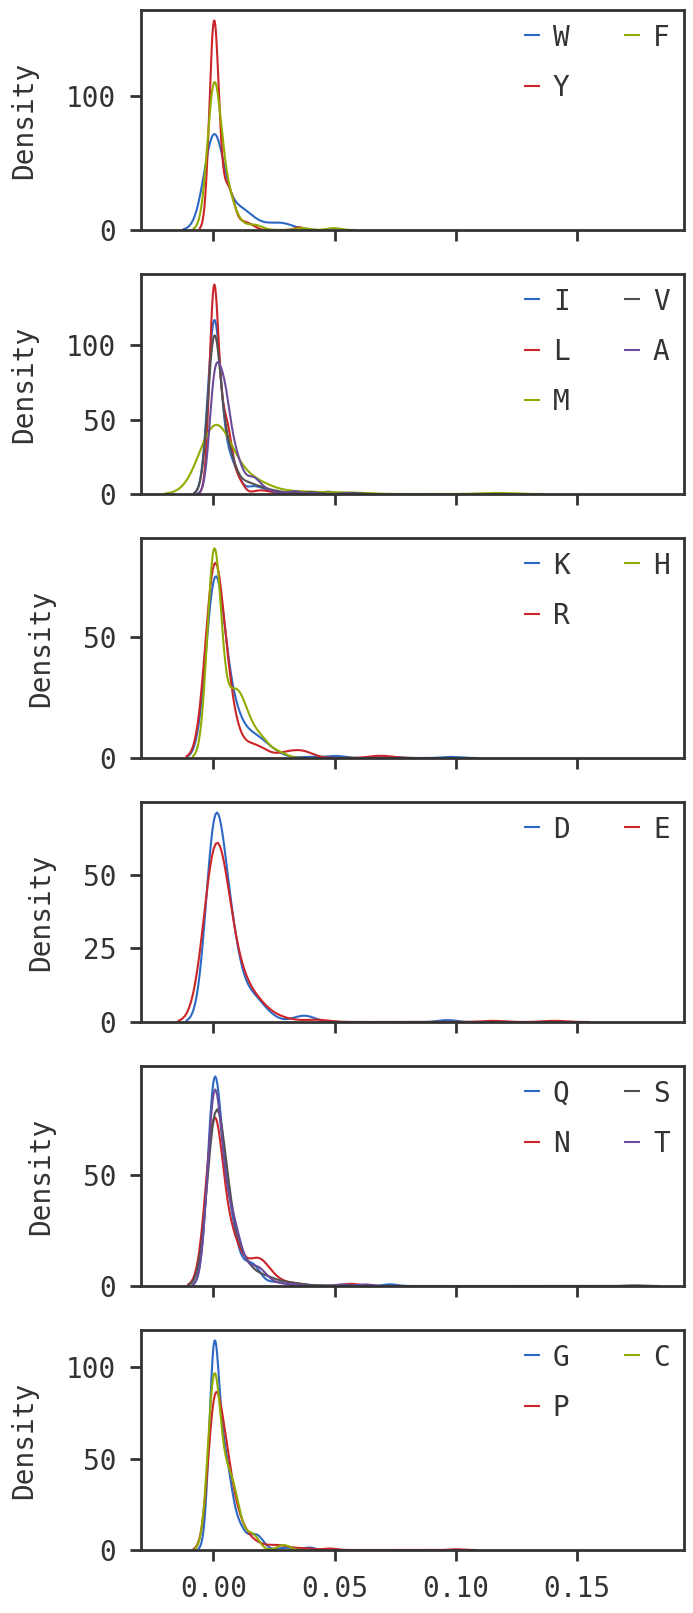

In [169]:
## find loss per aa type in disprot
from collections import defaultdict

aa_dict = defaultdict(list)
for protid in disprot_loss.keys():
    print(protid)
    seq = disprot_dict[protid]['seq']
    data = np.array(disprot_loss[protid]['aa1_loss'])
    for i in range(len(data)):
        aa_dict[seq[i]].append(data[i])

hydrophobic_aro = ["W", "Y", "F"]
hydrophobic_ali = ["I", "L", "M", "V", "A"]
positive = ["K", "R", "H"]
negative = ["D", "E"]
polar_neu = ["Q", "N", "X", "S", "T"]
special = ["G", "P", "C"]

classes = [hydrophobic_aro, hydrophobic_ali, positive, negative, polar_neu, special]

fig = plt.figure(figsize=(7,20), dpi=100)
AXs = fig.subplots(len(classes),1,sharex=True)
for i,c in enumerate(classes):
    for AA in c:
#     for AA in aa_dict.keys():
        data = np.array(aa_dict[AA])
        sns.kdeplot(data, label=f"{AA}", ax=AXs[i])
    AXs[i].legend(ncol=2)
plt.show()

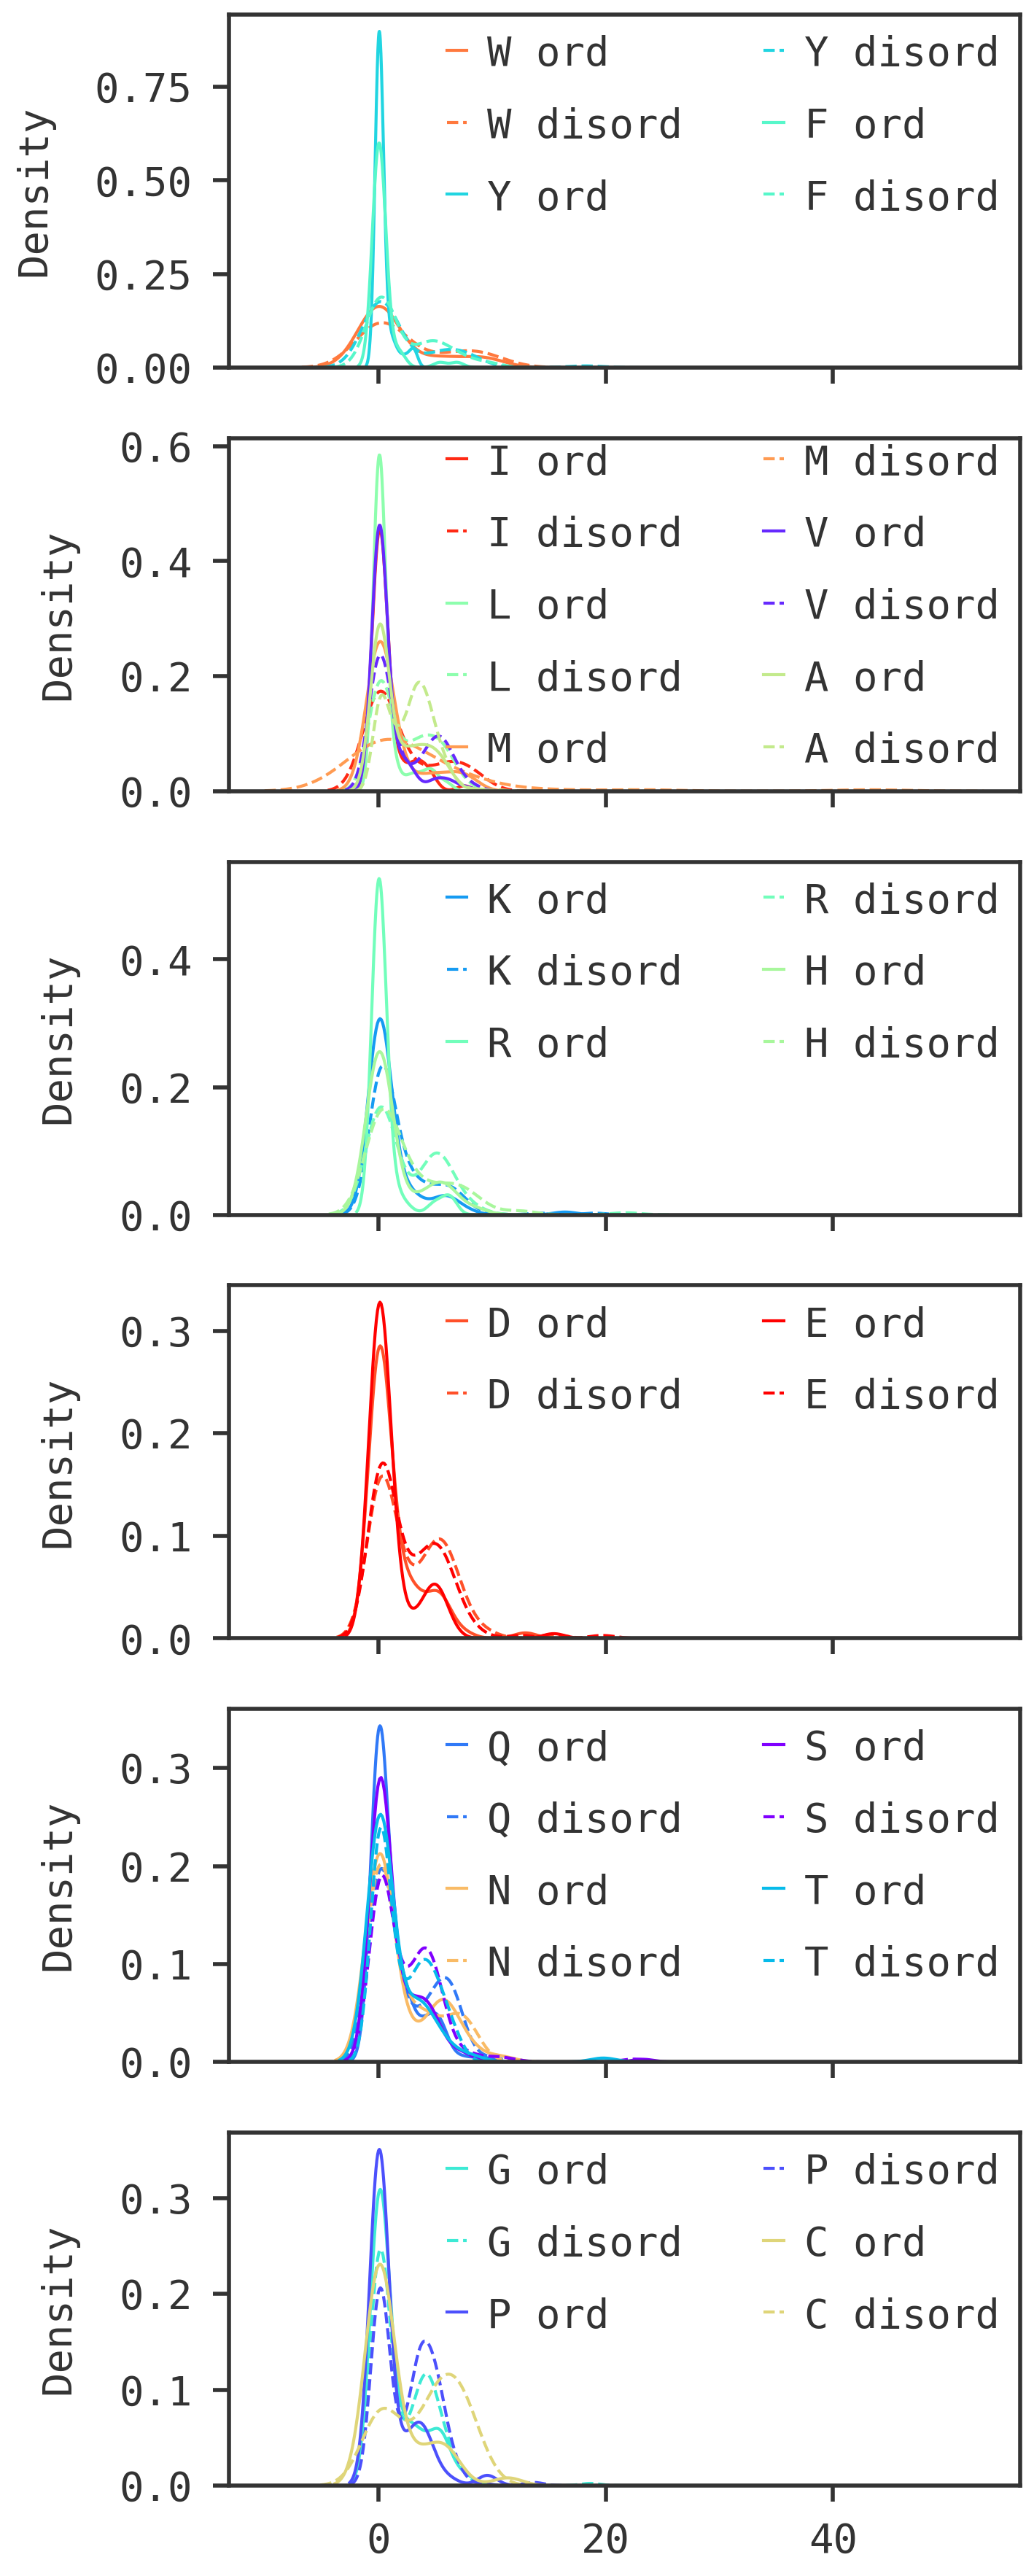

In [175]:
## find loss per aa type in disprot and discriminate between ordered and disordered regions
from collections import defaultdict
from matplotlib.pyplot import cm

aa_dict = defaultdict(list)
aa_dict_disordered = defaultdict(list)
for protid in disprot_loss.keys():
    seq = disprot_dict[protid]['seq']
    disorder = disprot_dict[protid]['disorder']
    data = np.array(disprot_loss[protid]['aa1_loss'])
    for i in range(len(data)):
        if disorder[i] == "-":
            aa_dict[seq[i]].append(data[i]*len(seq))   ### Should we multiply by seq len?? true difference lies there
        else:
            aa_dict_disordered[seq[i]].append(data[i]*len(seq))

allAAs = list(aa_dict.keys())            
NUM_COLORS = len(allAAs)
color = cm.rainbow(np.linspace(0, 1, NUM_COLORS))
AA2num = dict(zip(allAAs, np.arange(NUM_COLORS)))

hydrophobic_aro = ["W", "Y", "F"]
hydrophobic_ali = ["I", "L", "M", "V", "A"]
positive = ["K", "R", "H"]
negative = ["D", "E"]
polar_neu = ["Q", "N", "S", "T"]
special = ["G", "P", "C"]

classes = [hydrophobic_aro, hydrophobic_ali, positive, negative, polar_neu, special]

fig = plt.figure(figsize=(7,22), dpi=200)
AXs = fig.subplots(len(classes),1,sharex=True)
for i,c in enumerate(classes):
    for AA in c:
#     for AA in aa_dict.keys():
        data = np.array(aa_dict[AA])
        data_diso = np.array(aa_dict_disordered[AA])
        sns.kdeplot(data, label=f"{AA} ord", ax=AXs[i], color = color[AA2num[AA]])
        sns.kdeplot(data_diso, label=f"{AA} disord", ax=AXs[i], color = color[AA2num[AA]], linestyle="--")
    AXs[i].legend(ncol=2)
plt.show()

/tmp/ipykernel_17018/966484794.py:42: UserWarning: Dataset has 0 variance; skipping density estimate. Pass `warn_singular=False` to disable this warning.
  sns.kdeplot(data, label=f"{AA} ord", ax=AXs[i], color = color[AA2num[AA]])
/tmp/ipykernel_17018/966484794.py:43: UserWarning: Dataset has 0 variance; skipping density estimate. Pass `warn_singular=False` to disable this warning.
  sns.kdeplot(data_diso, label=f"{AA} disord", ax=AXs[i], color = color[AA2num[AA]], linestyle="--")


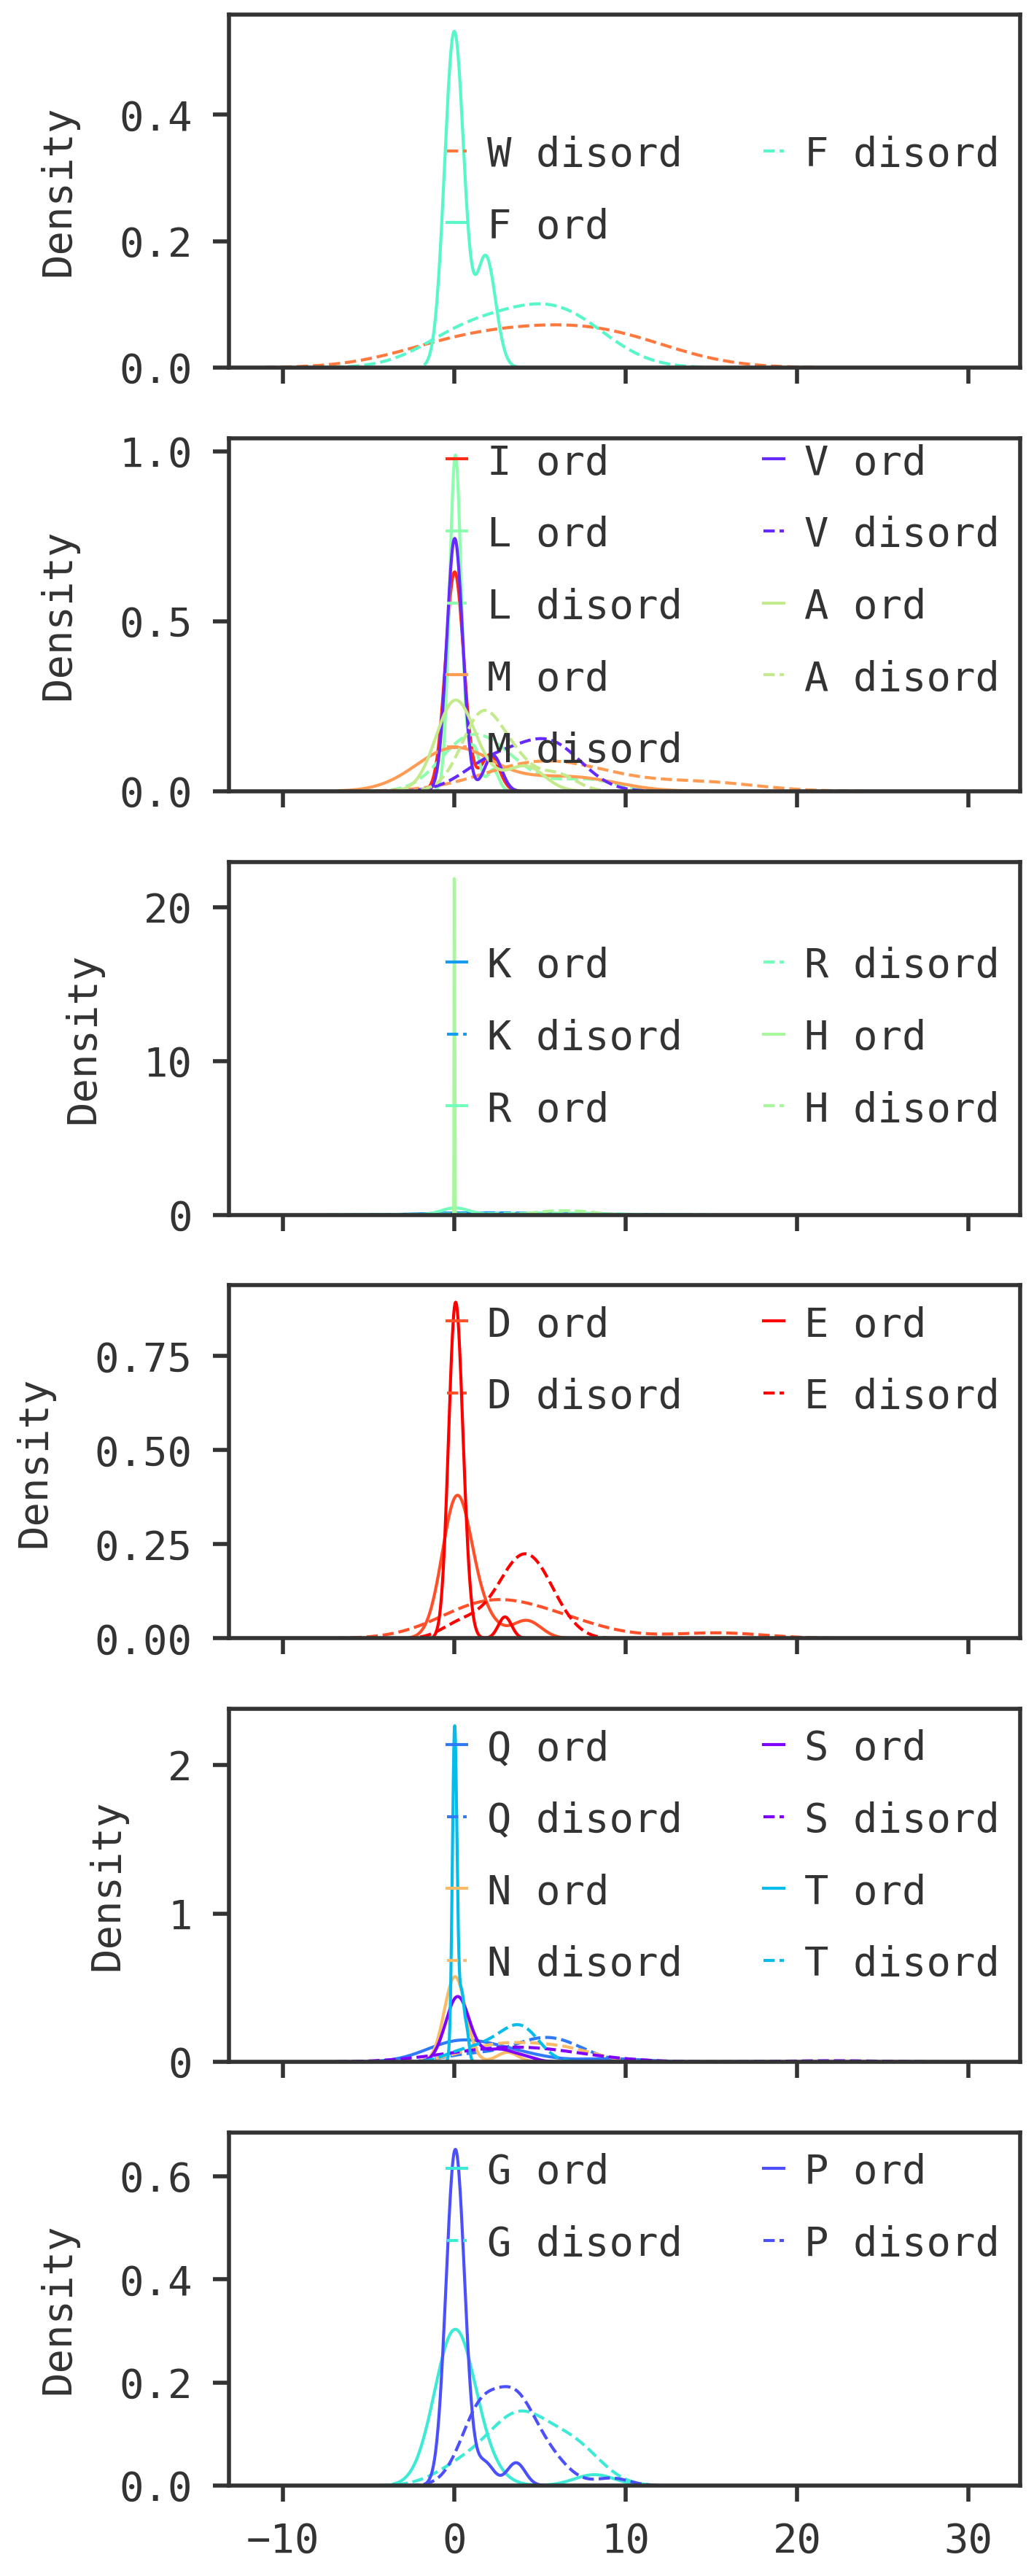

In [180]:
## Do the same but within the same sequence, do not compare across sequences with different length

## find loss per aa type in disprot and discriminate between ordered and disordered regions
from collections import defaultdict
from matplotlib.pyplot import cm

aa_dict = defaultdict(list)
aa_dict_disordered = defaultdict(list)
alldisprot_prots = list(disprot_loss.keys())

protid = alldisprot_prots[1]
seq = disprot_dict[protid]['seq']
disorder = disprot_dict[protid]['disorder']
data = np.array(disprot_loss[protid]['aa1_loss'])
for i in range(len(data)):
    if disorder[i] == "-":
        aa_dict[seq[i]].append(data[i]*len(seq))   ### Should we multiply by seq len?? true difference lies there
    else:
        aa_dict_disordered[seq[i]].append(data[i]*len(seq))

allAAs = list(aa_dict.keys())            
NUM_COLORS = len(allAAs)
color = cm.rainbow(np.linspace(0, 1, NUM_COLORS))
AA2num = dict(zip(allAAs, np.arange(NUM_COLORS)))

hydrophobic_aro = ["W", "Y", "F"]
hydrophobic_ali = ["I", "L", "M", "V", "A"]
positive = ["K", "R", "H"]
negative = ["D", "E"]
polar_neu = ["Q", "N", "S", "T"]
special = ["G", "P", "C"]

classes = [hydrophobic_aro, hydrophobic_ali, positive, negative, polar_neu, special]

fig = plt.figure(figsize=(7,22), dpi=200)
AXs = fig.subplots(len(classes),1,sharex=True)
for i,c in enumerate(classes):
    for AA in c:
        if AA in aa_dict and AA in aa_dict_disordered:
            data = np.array(aa_dict[AA])
            data_diso = np.array(aa_dict_disordered[AA])
            sns.kdeplot(data, label=f"{AA} ord", ax=AXs[i], color = color[AA2num[AA]])
            sns.kdeplot(data_diso, label=f"{AA} disord", ax=AXs[i], color = color[AA2num[AA]], linestyle="--")
    AXs[i].legend(ncol=2)
plt.show()

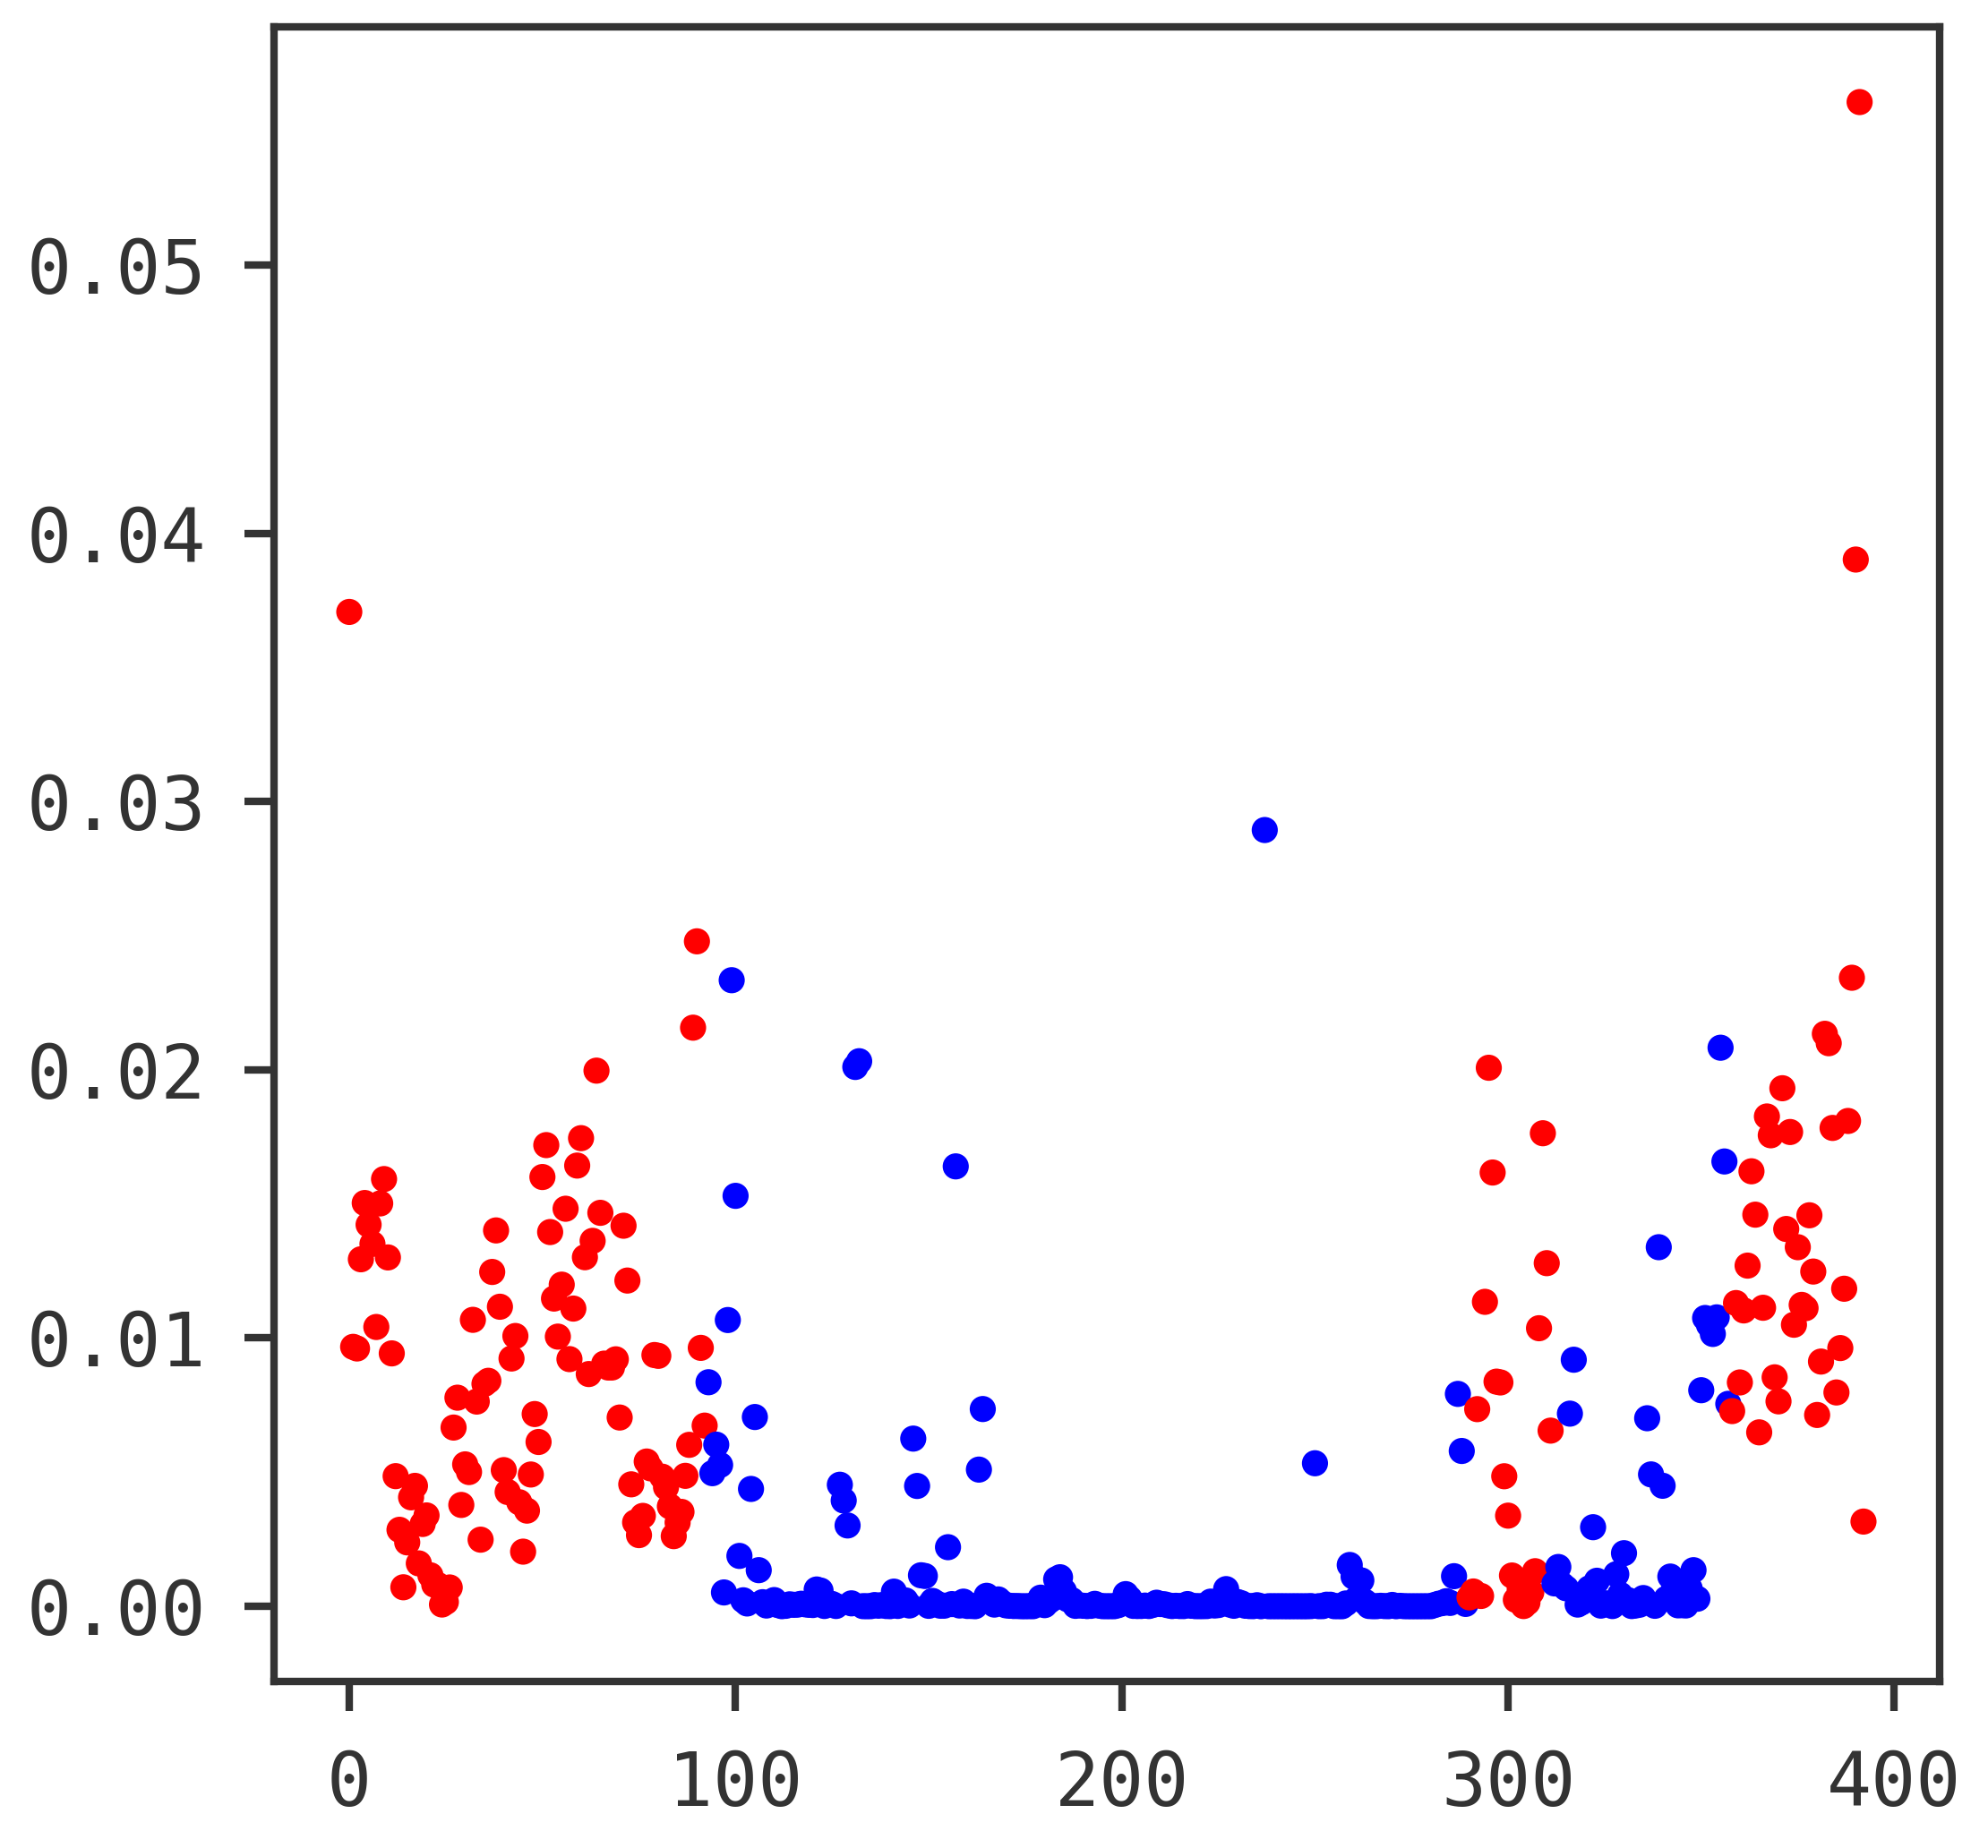

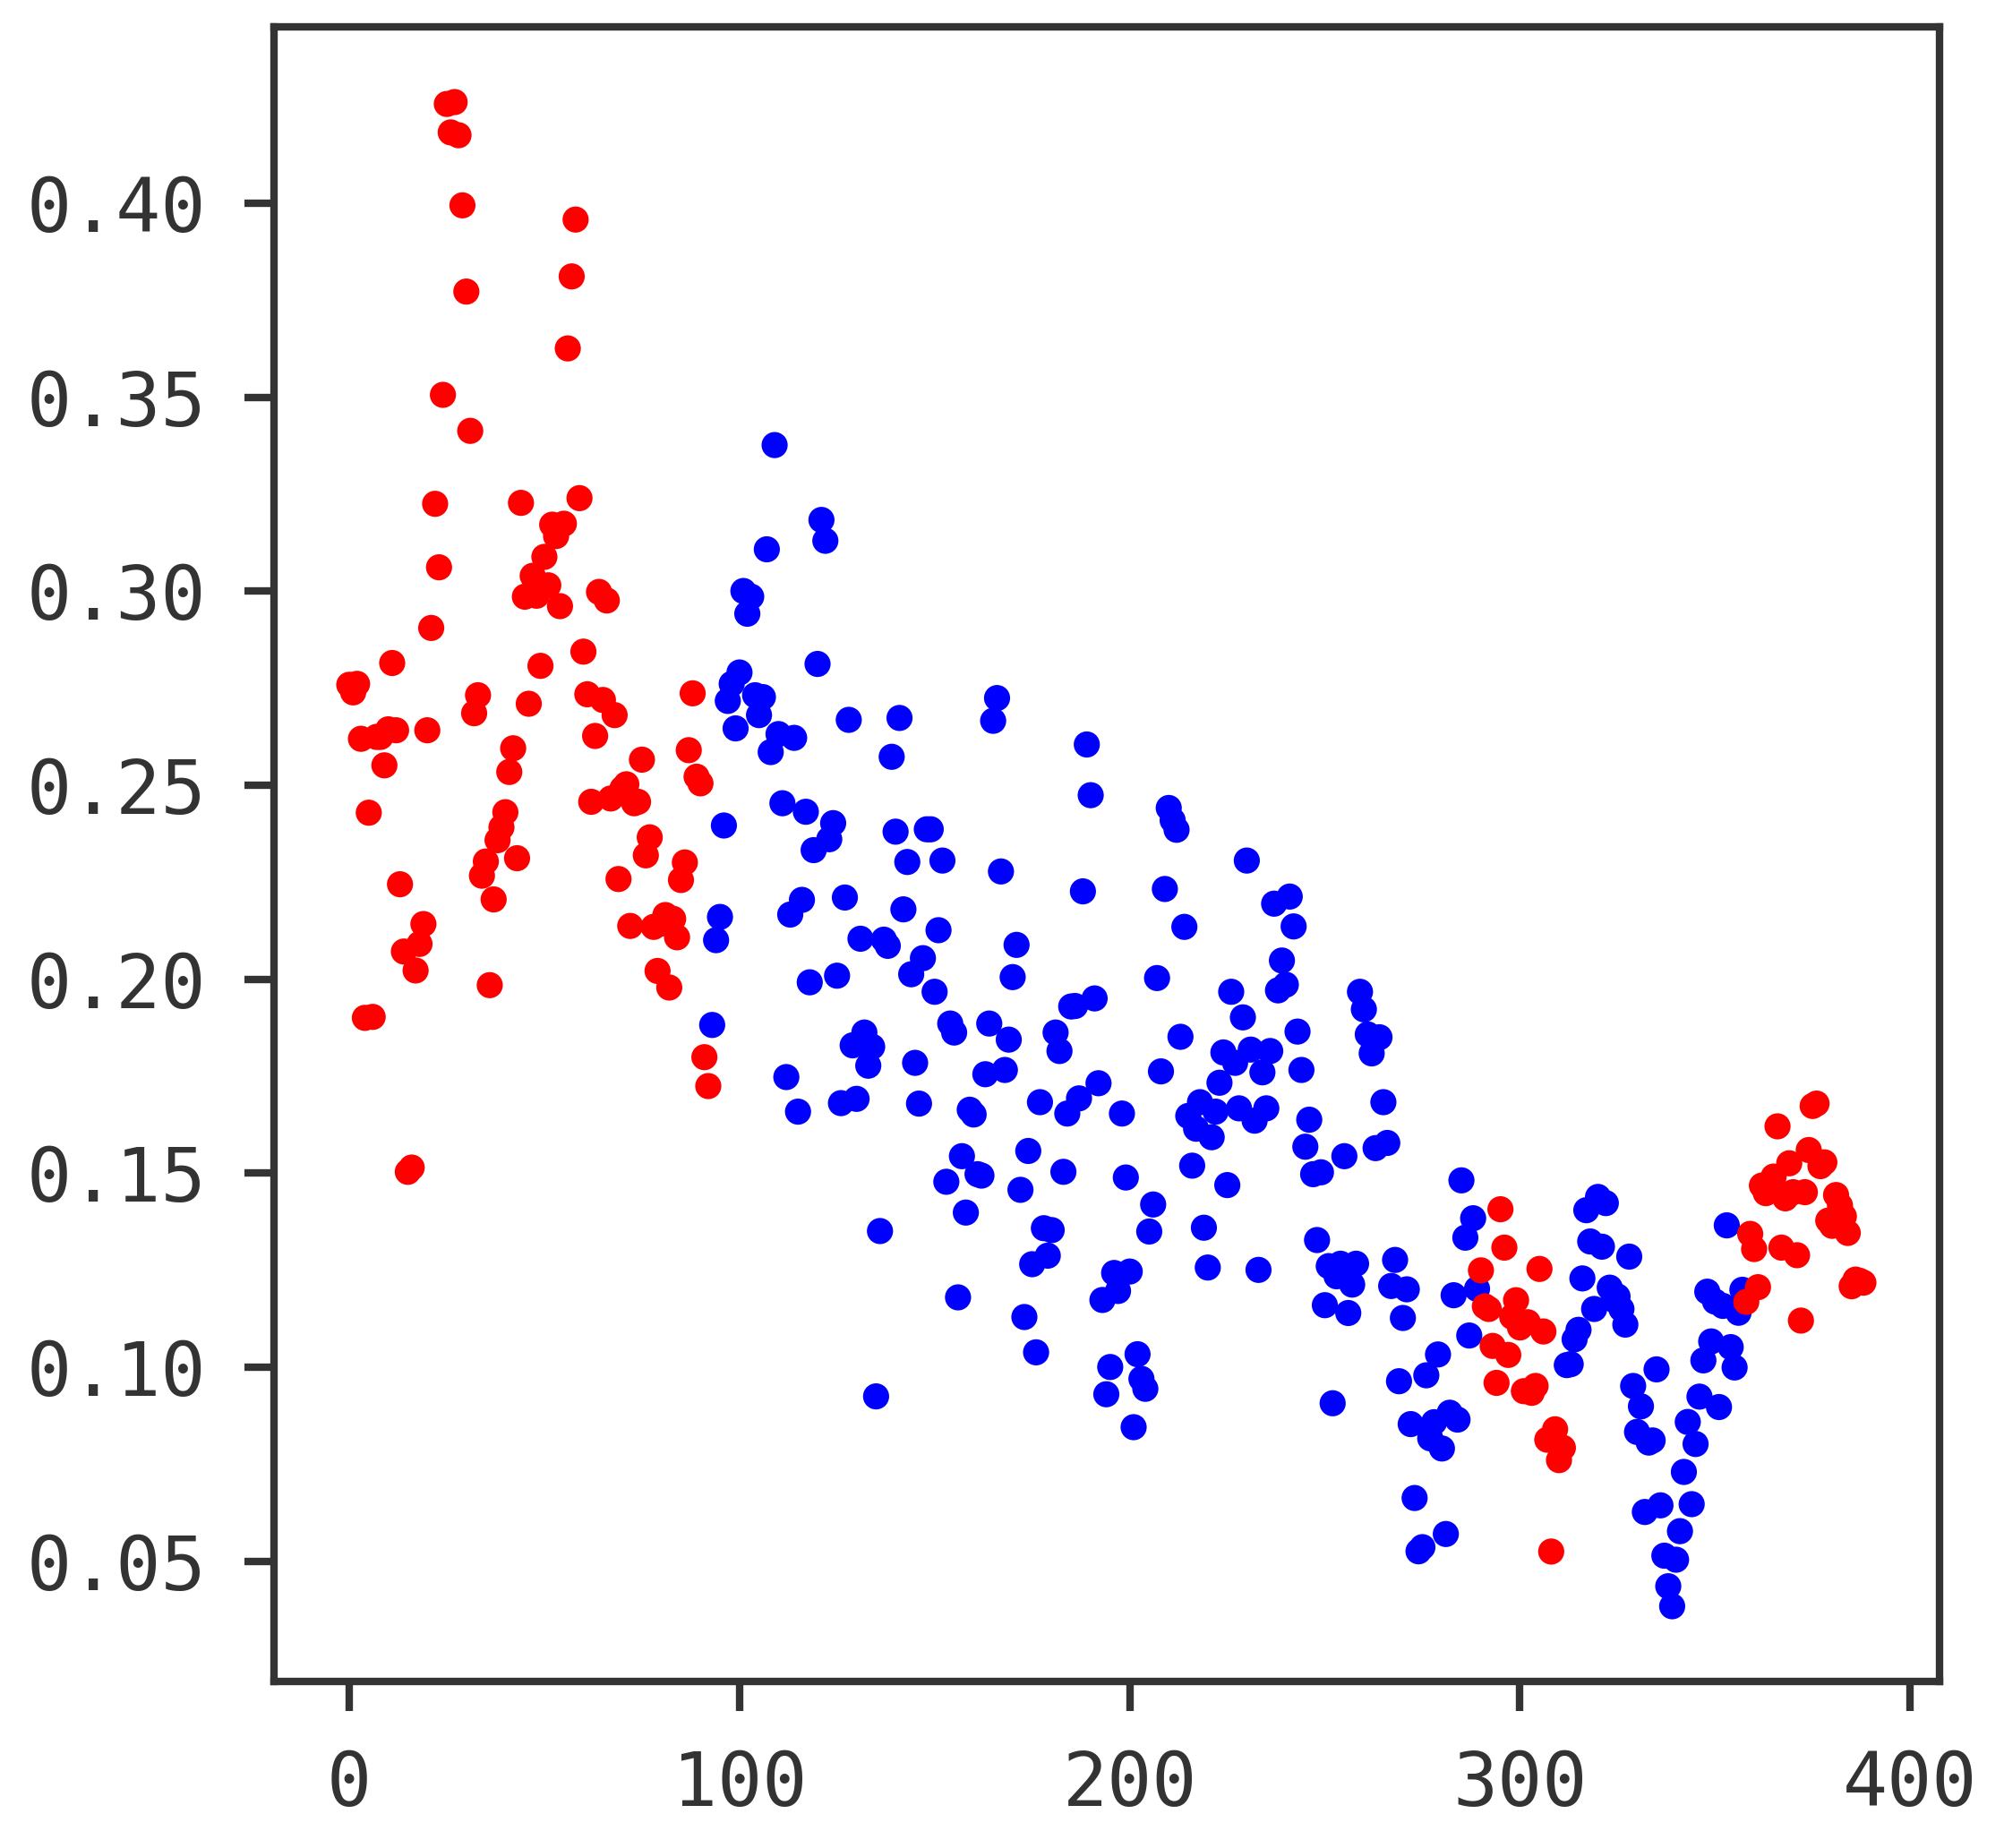

In [212]:
# Single protein sequential loss for 1aa and 5aa. Disordered regions are in red
protid = alldisprot_prots[1]
seq = disprot_dict[protid]['seq']
disorder = disprot_dict[protid]['disorder']
data = np.array(disprot_loss[protid]['aa1_loss'])
colorlist = list()
for i in range(len(data)):
    if disorder[i] == "-":
        colorlist.append("b")
    else:
        colorlist.append("r")

fig = plt.figure()
ax  = fig.add_subplot(111)
ax.scatter(np.arange(len(data)), data, color=colorlist)
plt.show()

data = np.array(disprot_loss[protid]['aa5_loss'])
colorlist = list()
for i in range(len(data)):
    if disorder[i] == "-":
        colorlist.append("b")
    else:
        colorlist.append("r")

fig = plt.figure()
ax  = fig.add_subplot(111)
ax.scatter(np.arange(len(data)), data, color=colorlist)
plt.show()

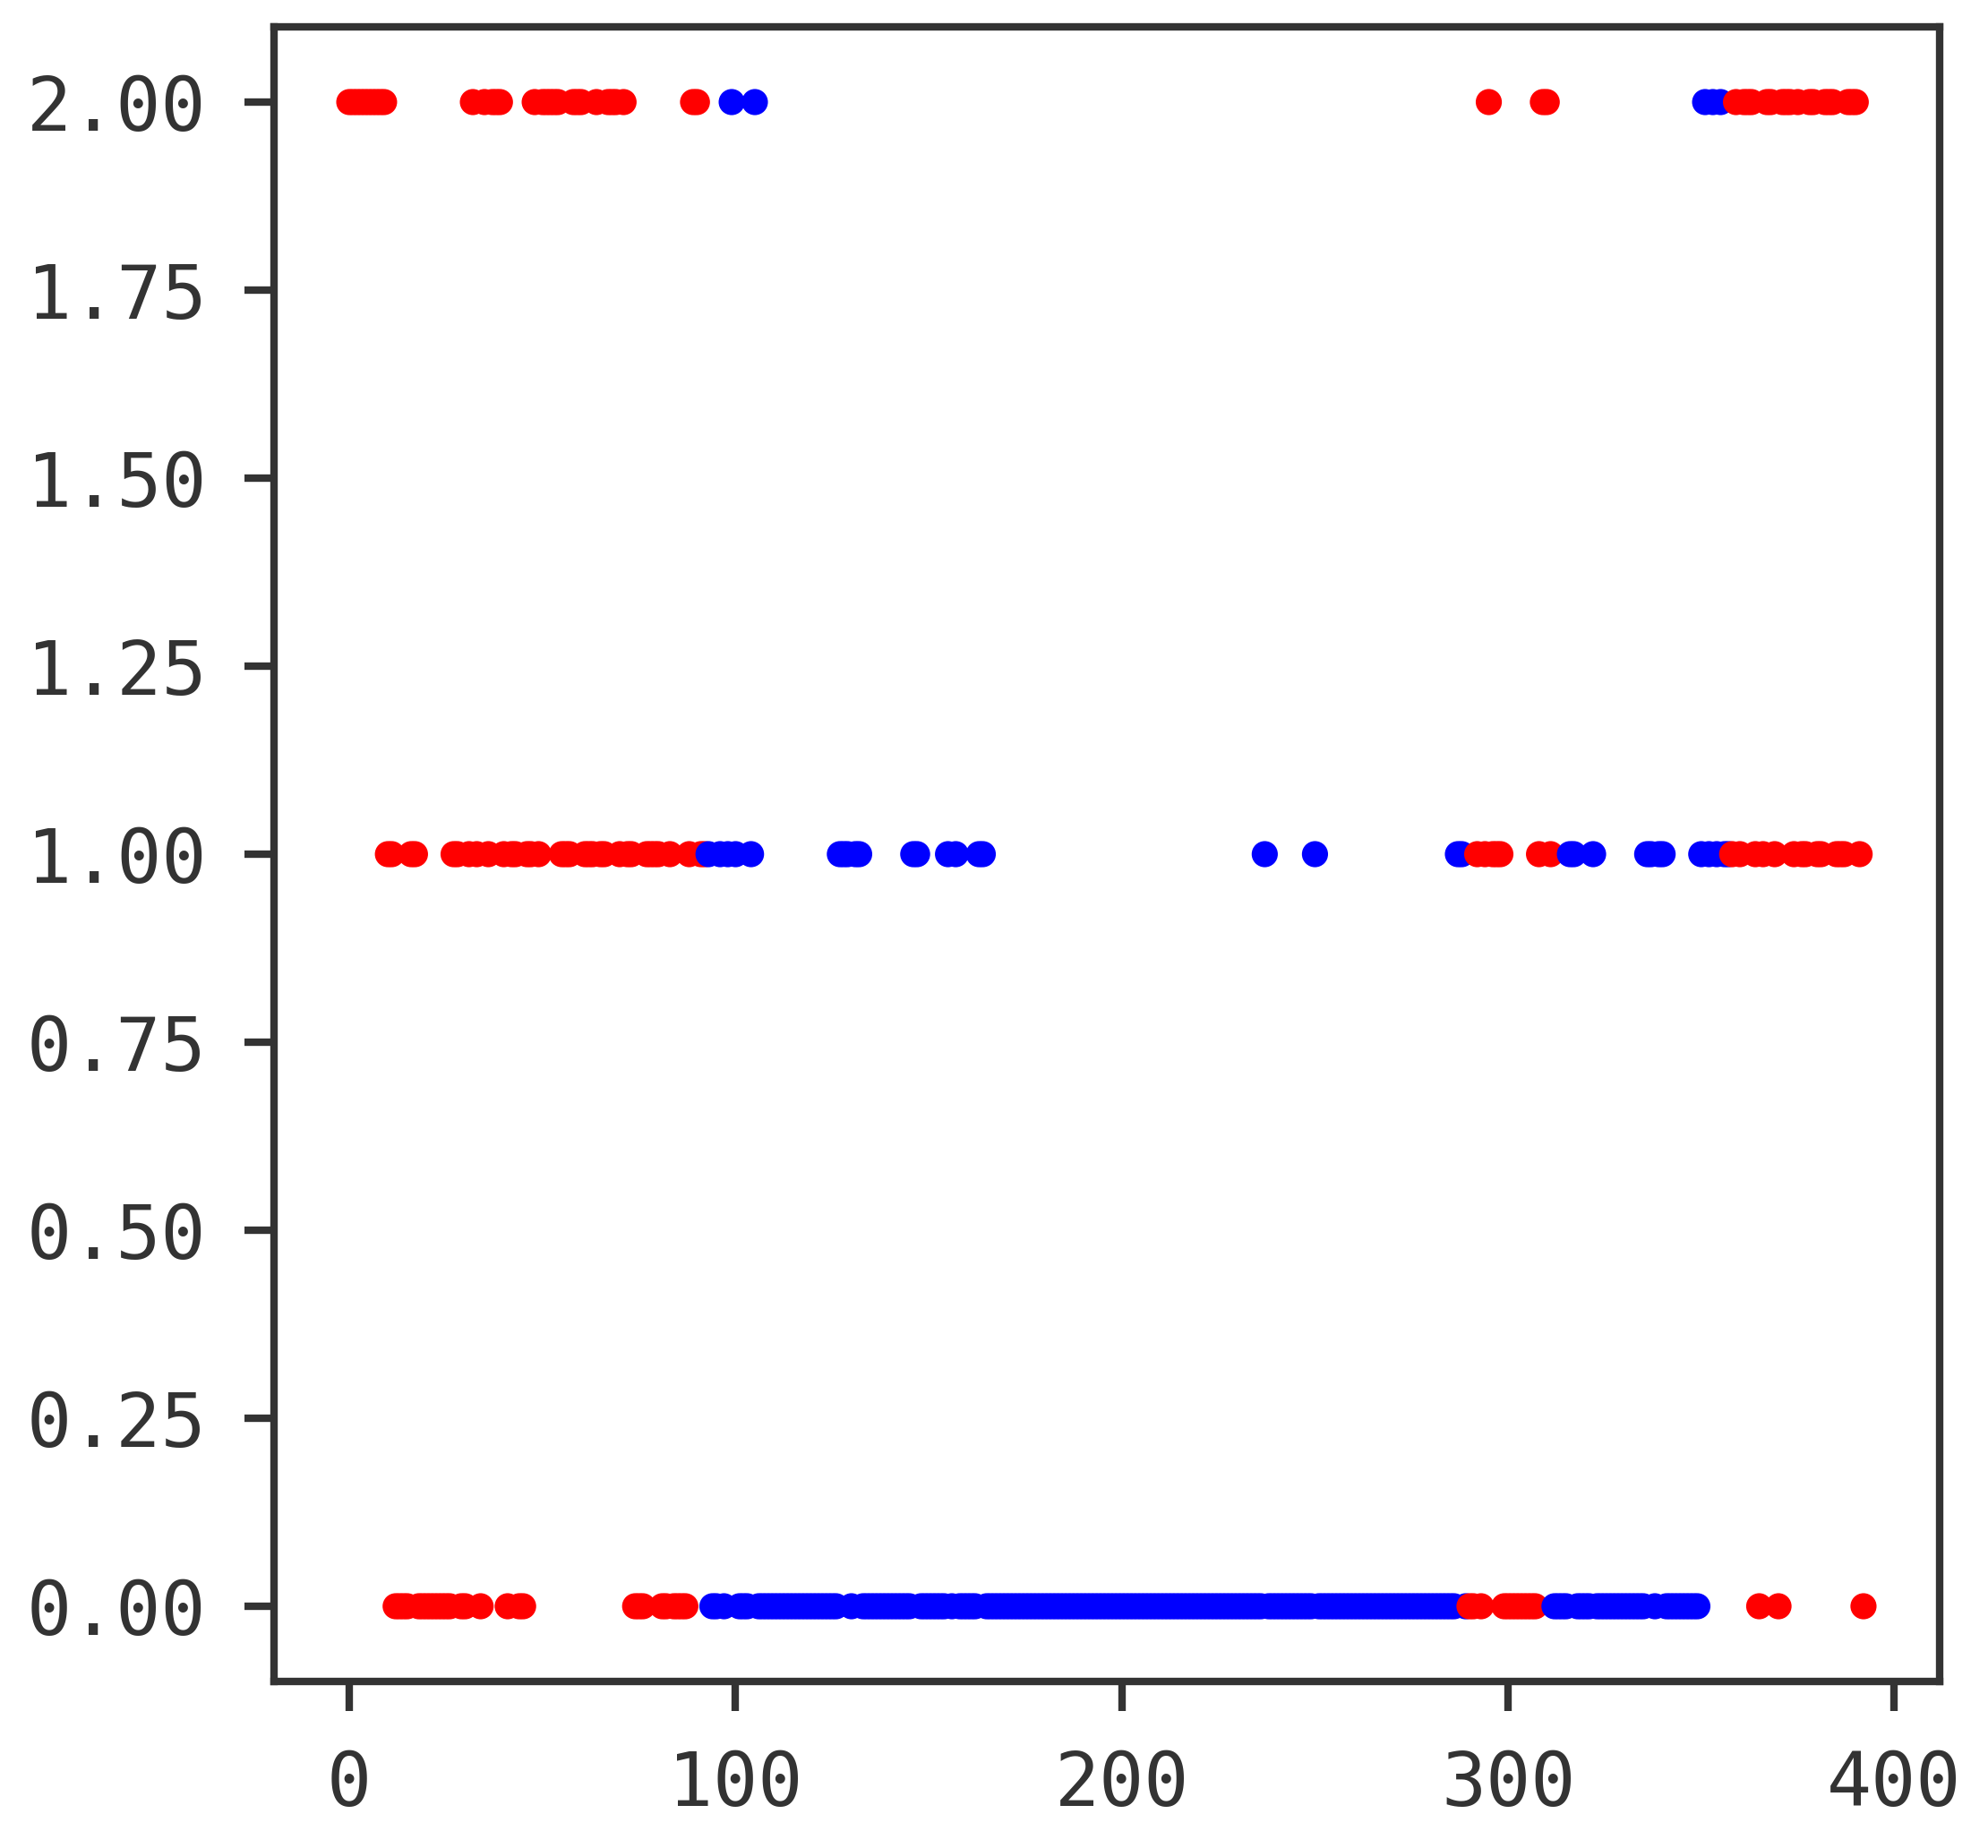

In [213]:
protid = alldisprot_prots[1]
seq = disprot_dict[protid]['seq']
disorder = disprot_dict[protid]['disorder']
data = np.array(disprot_loss[protid]['aa1_loss'])
mismatch_data = disprot_mismatch[protid]['aa1_match']
colorlist = list()
for i in range(len(data)):
    if disorder[i] == "-":
        colorlist.append("b")
    else:
        colorlist.append("r")

mdata = list()
for i,m in enumerate(mismatch_data):
    if m is True:
        n_mis = 0
    else:
        n_mis = len(m)
    mdata.append(n_mis)
        
fig = plt.figure()
ax  = fig.add_subplot(111)
ax.scatter(np.arange(len(data)), mdata, color=colorlist)
plt.show()

In [210]:
mdata = list()
for i,m in enumerate(mismatch_data):
    if m is True:
        n_mis = 0
    else:
        n_mis = len(m)
    mdata.append(n_mis)
    
    

0 [[0, 'E', 'M'], [1, 'S', 'E']] 2
1 [[1, 'A', 'E'], [2, 'D', 'E']] 2
2 [[2, 'D', 'E'], [3, 'L', 'P']] 2
3 [[3, 'L', 'P'], [4, 'G', 'Q']] 2
4 [[4, 'P', 'Q'], [5, 'P', 'S']] 2
5 [[5, 'P', 'S'], [6, 'S', 'D']] 2
6 [[6, 'P', 'D'], [7, 'L', 'P']] 2
7 [[7, 'L', 'P'], [8, 'A', 'S']] 2
8 [[8, 'P', 'S'], [9, 'P', 'V']] 2
9 [[9, 'P', 'V'], [10, 'P', 'E']] 2
10 [[10, 'P', 'E']] 1
11 [[11, 'S', 'P']] 1
12 True 0
13 True 0
14 True 0
15 True 0
16 [[17, 'A', 'T']] 1
17 [[17, 'A', 'T']] 1
18 True 0
19 True 0
20 True 0
21 True 0
22 True 0
23 True 0
24 True 0
25 True 0
26 True 0
27 [[28, 'D', 'N']] 1
28 [[28, 'D', 'N']] 1
29 True 0
30 True 0
31 [[32, 'Q', 'S']] 1
32 [[32, 'Q', 'S'], [33, 'S', 'P']] 2
33 [[33, 'S', 'P']] 1
34 True 0
35 [[35, 'S', 'P'], [36, 'P', 'S']] 2
36 [[36, 'P', 'S']] 1
37 [[37, 'L', 'Q'], [38, 'Q', 'A']] 2
38 [[38, 'L', 'A'], [39, 'A', 'M']] 2
39 [[39, 'V', 'M'], [40, 'E', 'D']] 2
40 [[40, 'A', 'D']] 1
41 True 0
42 [[43, 'L', 'M']] 1
43 [[43, 'L', 'M']] 1
44 True 0
45 True 0
46 [[